In [4136]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [4137]:
import pandas as pd
# Load CSV file
data = pd.read_csv(r"C:\Users\anagh\OneDrive\Desktop\Sem 4\capstone\Canada Tobacco, Nicotine Survey 2023\CSV\Data_Données\pumf.csv")

In [4138]:
data.head(2).T

,0,1
PUMFID,65183,65184
TBC_05A,2,2
TBC_05BR,96,96
TBC_10AR,6,6
TBC_10BR,6,6
...,...,...
FIRSTTRR,2,2
DV_ALC30,1,1
DV_CAN30,2,1
WTPP,699.07,1785.51


In [4139]:
data.columns

Index(['PUMFID', 'TBC_05A', 'TBC_05BR', 'TBC_10AR', 'TBC_10BR', 'TBC_15',
       'TBC_20R', 'TBC_25QR', 'TBC_30AR', 'TBC_30BR', 'TBC_30CR', 'TBC_30DR',
       'TBC_30ER', 'TBC_30FR', 'TBC_30GR', 'TBC_35', 'TBC_40', 'TBC_41A',
       'TBC_41BR', 'TBC_45AR', 'TBC_45B', 'TBC_45F', 'TBC_45GR', 'TBC_50R',
       'OTP_05AR', 'OTP_05BR', 'OTP_05CR', 'OTP_05DR', 'OTP_05ER', 'VAP_05AR',
       'VAP_05BR', 'VAP_10R', 'VAP_15AR', 'VAP_15BR', 'VAP_15CR', 'VAP_20R',
       'VAP_21R', 'VAP_30R', 'VAP_35R', 'VAP_40AR', 'VAP_40BR', 'VAP_40HR',
       'VAP_41AR', 'VAP_41BR', 'VAP_41IR', 'VAP_45R', 'VAP_60', 'CAN_05A',
       'CAN_05BR', 'CAN_10A', 'CAN_10BR', 'CAN_15AR', 'CAN_15BR', 'CAN_17R',
       'CAN_20A', 'CAN_20BR', 'CAN_25AR', 'CAN_25BR', 'CAN_30AR', 'CAN_30BR',
       'CAN_30CR', 'CAN_30G', 'IU_05R', 'ALC_05', 'ALC_10R', 'GENDER',
       'AGEGROUP', 'PROV_C', 'ED_05R', 'INDFLGR', 'PGDVFLR', 'SORFLGR',
       'LTC_10R', 'GEN_01', 'GEN_05', 'DV_SS', 'DV_SSB', 'CIGWAVR', 'DV_VP30R',
       'DVVP3

In [4140]:
# Renaming feature names
# Dictionary mapping variable codes to descriptions (extracted from PDF)
column_mapping = {
    "PUMFID": "Random ID",
    "TBC_05A": "Smoked a cigarette - lifetime",
    "TBC_05BR": "Age first time smoked whole cigarette",
    "TBC_10AR": "Frequency smoked cigarettes - past 30 days",
    "TBC_10BR": "Days smoked per week - past 30 days",
    "TBC_15": "Smoked at least 100 cigarettes - lifetime",
    "TBC_20R": "When stopped smoking cigarettes",
    "TBC_25QR": "Month stopped smoking",
    "TBC_30AR": "Number of cigarettes smoked - Day 1",
    "TBC_30BR": "Number of cigarettes smoked - Day 2",
    "TBC_30CR": "Number of cigarettes smoked - Day 3",
    "TBC_30DR": "Number of cigarettes smoked - Day 4",
    "TBC_30ER": "Number of cigarettes smoked - Day 5",
    "TBC_30FR": "Number of cigarettes smoked - Day 6",
    "TBC_30GR": "Number of cigarettes smoked - Day 7",
    "TBC_35": "Times stopped smoking - past 12 months",
    "TBC_40": "Tried quitting by switching to vaping",
    "GENDER": "Gender",
    "AGEGROUP": "Age Group",
    "PROV_C": "Province of Residence",
    "DV_SS": "Smoking Status (3 levels)"
}
# Rename columns
data.rename(columns=column_mapping, inplace=True)


data.head(2)


,Random ID,Smoked a cigarette - lifetime,Age first time smoked whole cigarette,Frequency smoked cigarettes - past 30 days,Days smoked per week - past 30 days,Smoked at least 100 cigarettes - lifetime,When stopped smoking cigarettes,Month stopped smoking,Number of cigarettes smoked - Day 1,Number of cigarettes smoked - Day 2,...,DV_VP30R,DVVP30BR,DVCAN30B,DV_VC30,DV_VC30B,FIRSTTRR,DV_ALC30,DV_CAN30,WTPP,VERDATE
0,65183,2,96,6,6,6,6,96,96,96,...,2,3,3,2,3,2,1,2,699.07,1-Feb-24
1,65184,2,96,6,6,6,6,96,96,96,...,2,3,2,1,2,2,1,1,1785.51,1-Feb-24


In [4141]:
# Rename remaining feature names
column_mapping = {
    "TBC_41A": "Used vaping device with nicotine",
    "TBC_41BR": "Used vaping device without nicotine/unknown",
    "TBC_45AR": "Did to quit smoking - Deal with friend/family or used app",
    "TBC_45B": "Did to quit smoking - Reduced cigarettes smoked",
    "TBC_45F": "Did to quit smoking - Tried to quit on own",
    "TBC_45GR": "Did to quit smoking - Other",
    "TBC_50R": "Used nicotine replacement products",
    "OTP_05AR": "Frequency smoked - Little cigars/cigarillos - past 30 days",
    "OTP_05BR": "Frequency smoked - Cigars - past 30 days",
    "OTP_05CR": "Frequency smoked - Tobacco in traditional pipe - past 30 days",
    "OTP_05DR": "Frequency smoked - Chewing tobacco/snuff - past 30 days",
    "OTP_05ER": "Frequency smoked - Tobacco water-pipe - past 30 days",
    "VAP_05AR": "Tried vaping - lifetime",
    "VAP_05BR": "Age first time tried vaping",
    "VAP_10R": "Frequency vaped - past 30 days",
    "VAP_15AR": "Days vaped e-liquid with nicotine - past 30 days",
    "VAP_15BR": "Days vaped e-liquid without nicotine - past 30 days",
    "VAP_15CR": "Days vaped e-liquid unknown content - past 30 days",
    "VAP_20R": "Times picked up vaping device - days vaped",
    "VAP_21R": "Puffs taken each time vaping device is picked up",
    "VAP_30R": "Flavour vaped most often",
    "VAP_35R": "Main reason for vaping - currently",
    "VAP_40AR": "Where get vaping devices - Vape shop",
    "VAP_40BR": "Where get vaping devices - Store or online",
    "VAP_40HR": "Where get vaping devices - Other",
    "VAP_41AR": "Where get vaping liquids - Vape shop",
    "VAP_41BR": "Where get vaping liquids - Store or online",
    "VAP_41IR": "Where get vaping liquids - Other",
    "VAP_45R": "Times stopped vaping - past 12 months",
    "VAP_60": "Perception of harm - Vaping vs cigarettes",
    "CAN_05A": "Smoked cannabis - lifetime",
    "CAN_05BR": "Age first time smoked cannabis",
    "CAN_10A": "Frequency smoked cannabis - past 30 days",
    "CAN_10BR": "Days smoked cannabis at least once - past 30 days",
    "CAN_15AR": "Frequency smoked cannabis/tobacco mix - past 30 days",
    "CAN_15BR": "Days smoked cannabis/tobacco mix - past 30 days",
    "CAN_17R": "Frequency consumed cannabis edibles - past 30 days",
    "CAN_20A": "Vaped cannabis - lifetime",
    "CAN_20BR": "Age first time vaped cannabis",
    "CAN_25AR": "Frequency vaped cannabis - past 30 days",
    "CAN_25BR": "Days vaped cannabis at least once - past 30 days",
    "CAN_30AR": "Where get cannabis device/liquid - Store/Online",
    "CAN_30BR": "Where get cannabis devices/liquids - Family/Acquaintance",
    "CAN_30CR": "Where get cannabis devices/liquids - Other",
    "CAN_30G": "Where get cannabis devices/liquids - A friend",
    "IU_05R": "Tried first substance",
    "ALC_05": "Drank alcohol - past 30 days",
    "ALC_10R": "Drank 4+ drinks on one occasion - past 12 months",
    "GENDER": "Gender",
    "AGEGROUP": "Age Group",
    "PROV_C": "Province of Residence",
    "ED_05R": "Highest certificate/diploma/degree completed",
    "INDFLGR": "Indigenous identity flag",
    "PGDVFLR": "Visible minority flag",
    "SORFLGR": "Sexual identity flag",
    "LTC_10R": "Person with disability (self-declared)",
    "GEN_01": "Perceived health",
    "GEN_05": "Perceived mental health",
    "DV_SS": "Smoking Status (3 levels)",
    "DV_SSB": "Smoking Status (4 levels)",
    "CIGWAVR": "Avg cigarettes smoked per day (weekly basis)",
    "DV_VP30R": "Vaped in the past 30 days (2 levels)",
    "DVVP30BR": "Vaped in the past 30 days (3 levels)",
    "DVCAN30B": "Cannabis smoked in the past 30 days (3 levels)",
    "DV_VC30": "Vaped cannabis in the past 30 days (2 levels)",
    "DV_VC30B": "Vaped cannabis in the past 30 days (3 levels)",
    "FIRSTTRR": "First product tried",
    "DV_ALC30": "Consumed alcohol in the past 30 days",
    "DV_CAN30": "Cannabis smoked in the past 30 days (2 levels)",
    "WTPP": "Survey weight - PUMF",
    "VERDATE": "Date of file creation"
}

# Rename columns
data.rename(columns=column_mapping, inplace=True)


In [4142]:
data.columns

Index(['Random ID', 'Smoked a cigarette - lifetime',
       'Age first time smoked whole cigarette',
       'Frequency smoked cigarettes - past 30 days',
       'Days smoked per week - past 30 days',
       'Smoked at least 100 cigarettes - lifetime',
       'When stopped smoking cigarettes', 'Month stopped smoking',
       'Number of cigarettes smoked - Day 1',
       'Number of cigarettes smoked - Day 2',
       'Number of cigarettes smoked - Day 3',
       'Number of cigarettes smoked - Day 4',
       'Number of cigarettes smoked - Day 5',
       'Number of cigarettes smoked - Day 6',
       'Number of cigarettes smoked - Day 7',
       'Times stopped smoking - past 12 months',
       'Tried quitting by switching to vaping',
       'Used vaping device with nicotine',
       'Used vaping device without nicotine/unknown',
       'Did to quit smoking - Deal with friend/family or used app',
       'Did to quit smoking - Reduced cigarettes smoked',
       'Did to quit smoking - Tried to 

# DEEP DIVE INTO FEATURES

### TARGET VARIABLE (SMOKING STATUS (3 LEVELS))

In [4143]:
# Target variable 
data["Smoking Status (3 levels)"].replace({1:"Current Smoker",2:"Former Smoker",3:"Never Smoked",9:"Not stated"}).value_counts()

Smoking Status (3 levels)
Never Smoked      8662
Former Smoker     2271
Current Smoker    1198
Not stated           2
Name: count, dtype: int64

Text(0, 0.5, 'frequency')

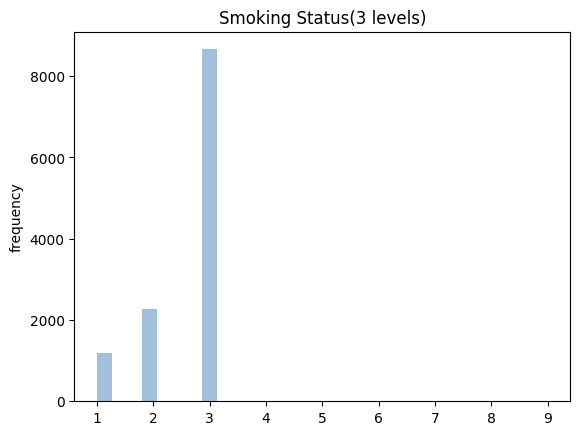

In [4144]:
plt.hist(data["Smoking Status (3 levels)"], bins=30,alpha=0.5,
histtype='stepfilled', color='steelblue',
edgecolor='none');
plt.title("Smoking Status(3 levels)")
plt.ylabel("frequency")

In [4145]:
# logically the number of people who answered "no" for smoked cigarette ina lifetime is equal to "Never smoked " + "Not stated"

In [4146]:
# Respondents who has smoked tobacco in their lifetime
data["Smoked a cigarette - lifetime"].replace({1:"yes",2:"No"}).value_counts()

Smoked a cigarette - lifetime
No     7270
yes    4863
Name: count, dtype: int64

In [4147]:
# But here it does not tally up

In [4148]:
data[data["Smoked a cigarette - lifetime"]==2]["Smoking Status (3 levels)"].value_counts()

Smoking Status (3 levels)
3    7270
Name: count, dtype: int64

In [4149]:
# looking further we saw that some non-smokers and not stated respondents answered that they have used a cigarette in lifetime , this is contradictory.
# as smoking status is a derived variable, the error might be due to the way it's derived or the ambiquity of the question "Have you ever smoked a whole cigarette?", they might have smoked just few puffs and never completed a whole cigarette 

In [4150]:
# This might be an error

In [4151]:
data[data["Smoking Status (3 levels)"].isin([3,9])]["Smoked a cigarette - lifetime"].value_counts()

Smoked a cigarette - lifetime
2    7270
1    1394
Name: count, dtype: int64

In [4152]:
data.loc[
    data["Smoking Status (3 levels)"].isin([3, 9]) & 
    (data["Smoked a cigarette - lifetime"] == 1),
][["Smoked a cigarette - lifetime","Smoking Status (3 levels)"]]


,Smoked a cigarette - lifetime,Smoking Status (3 levels)
7,1,3
13,1,3
33,1,3
36,1,3
41,1,3
...,...,...
12113,1,3
12115,1,3
12121,1,3
12128,1,3


In [4153]:
data.loc[
    data["Smoking Status (3 levels)"].isin([3, 9]) & 
    (data["Smoked a cigarette - lifetime"] == 1),
][["Smoked a cigarette - lifetime","Age first time smoked whole cigarette","Smoking Status (3 levels)"]]

,Smoked a cigarette - lifetime,Age first time smoked whole cigarette,Smoking Status (3 levels)
7,1,4,3
13,1,2,3
33,1,2,3
36,1,5,3
41,1,1,3
...,...,...,...
12113,1,2,3
12115,1,2,3
12121,1,4,3
12128,1,3,3


In [4154]:
# may be we have to deal with it while feature engineering

In [4155]:
# as the data is derived they might have only considered  smokers with frequent use as smoker

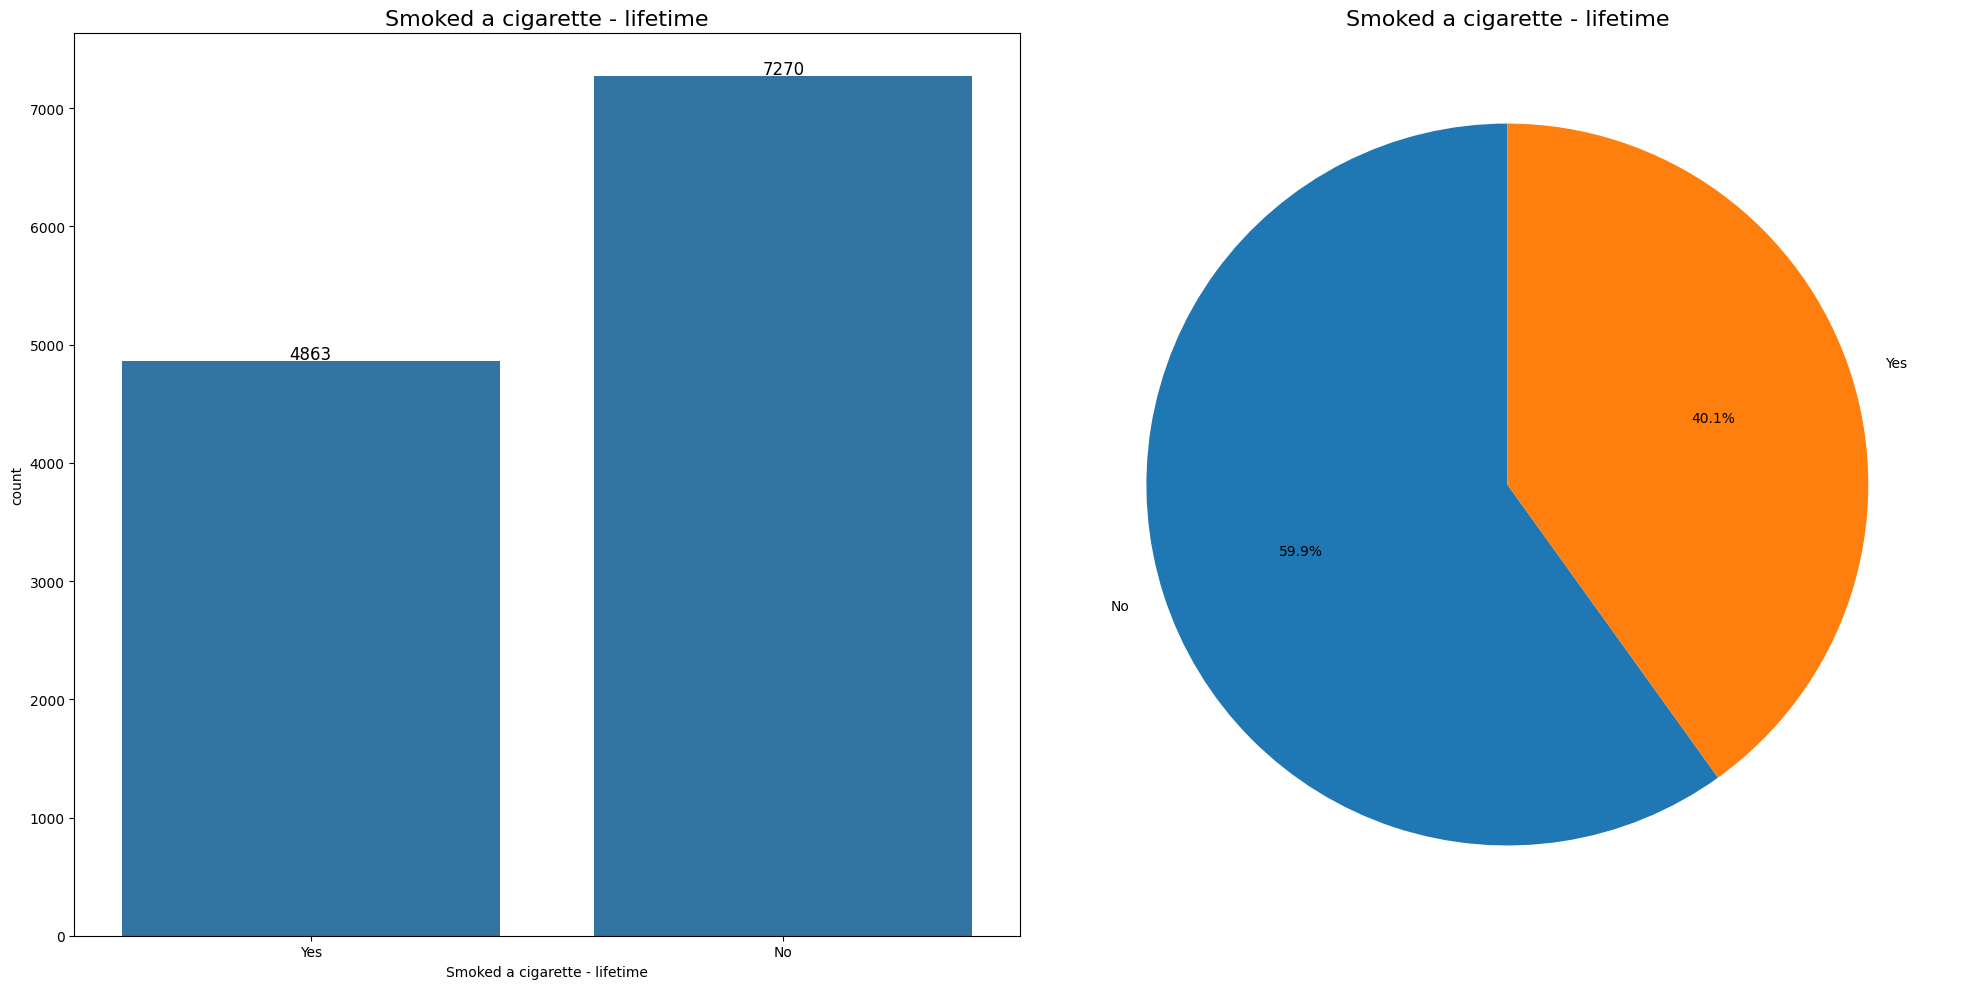

In [4156]:
# smoked canabis
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Smoked a cigarette - lifetime", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticks([0, 1]) 
ax.set_xticklabels(["Yes", "No"]) 
plt.title('Smoked a cigarette - lifetime', fontsize=16)

plt.subplot(1,2,2)
TBC_counts = data["Smoked a cigarette - lifetime"].value_counts()
# Plot the pie chart
plt.pie(TBC_counts, labels=["No","Yes"], autopct='%1.1f%%',startangle=90)
plt.title('Smoked a cigarette - lifetime', fontsize=16)


plt.tight_layout()
plt.show()

In [4157]:
# The target variable is dependent on Smoked a cigarette - lifetime, Frequency smoked cigarettes - past 30 days, Smoked at least 100 cigarettes - lifetime
# Maybe remove these variables before traing the machine learning model

## Demographic Features

In [4158]:
# Demographic variables
Dem_var=['Age Group', 'Province of Residence',
       'Highest certificate/diploma/degree completed',
       'Indigenous identity flag', 'Visible minority flag',
       'Sexual identity flag', 'Person with disability (self-declared)', 'Smoking Status (3 levels)']

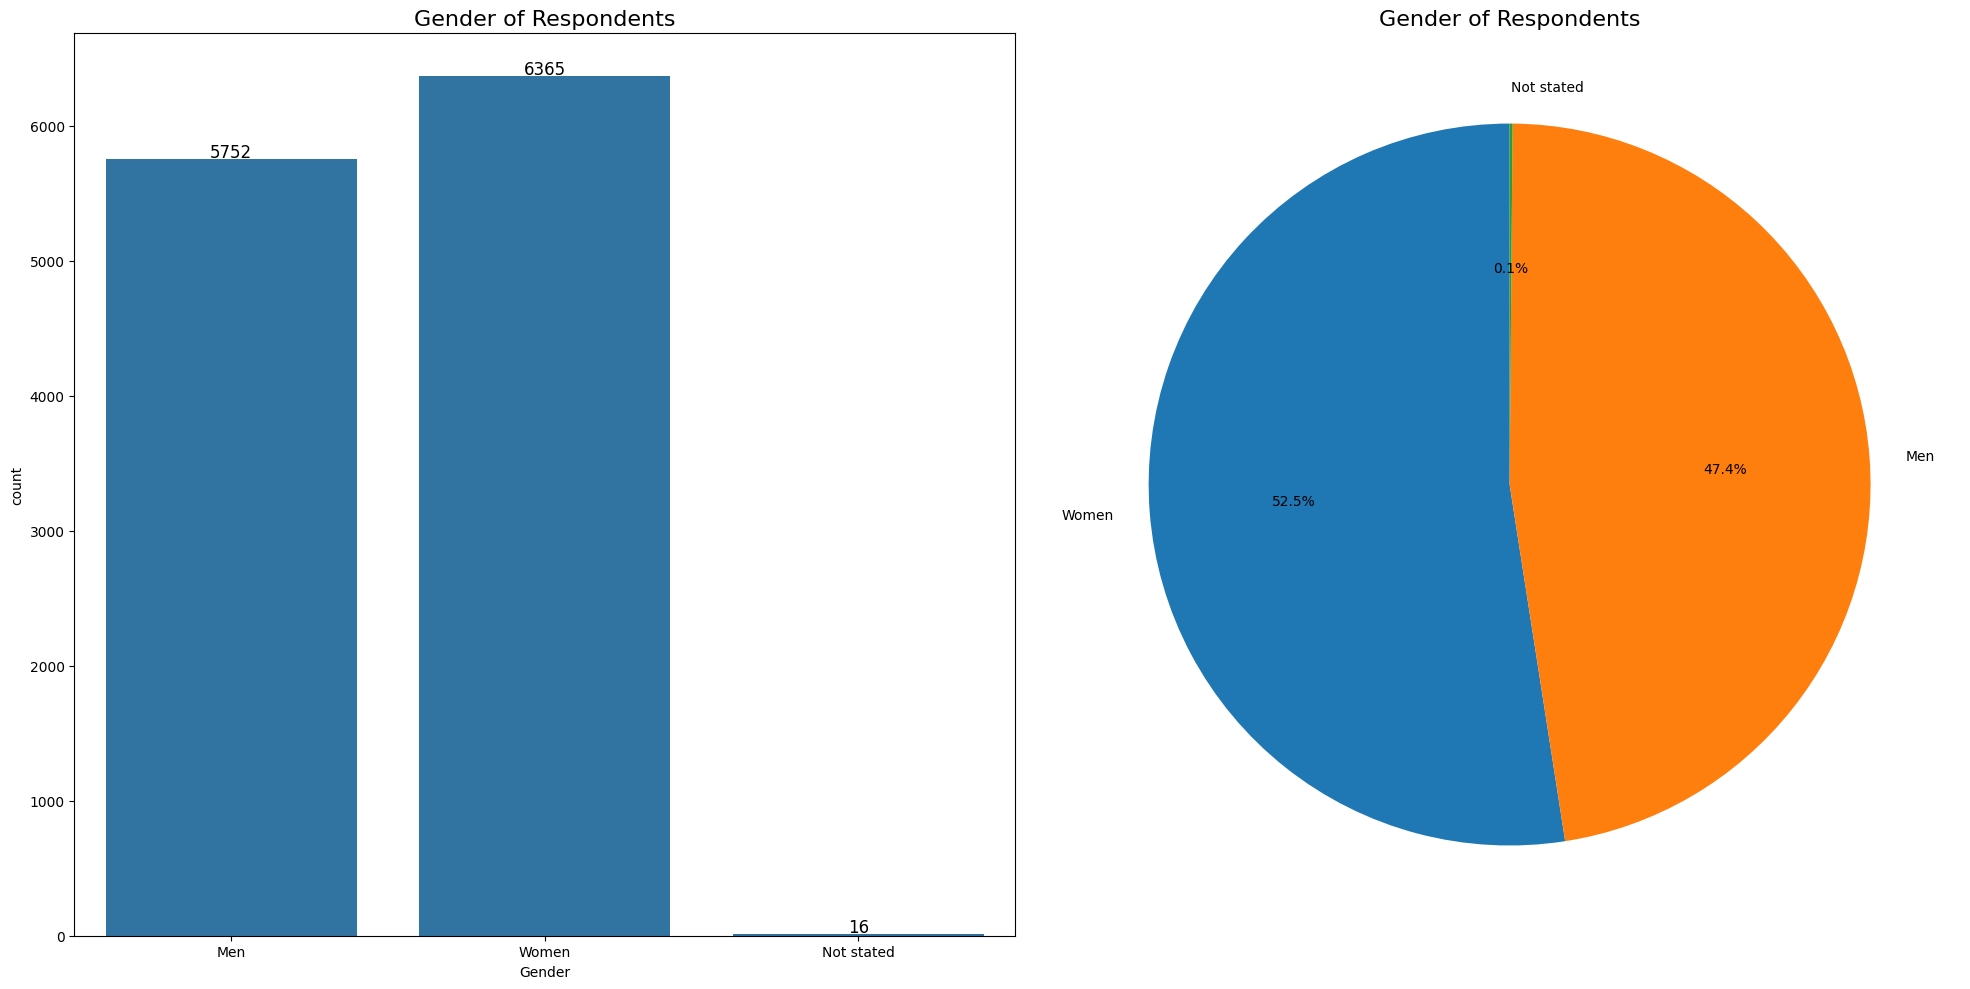

In [4159]:
# Respondents
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Gender", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticks([0, 1,2]) 
ax.set_xticklabels(["Men", "Women","Not stated"]) 
plt.title('Gender of Respondents', fontsize=16)

plt.subplot(1,2,2)
Gender_counts = data["Gender"].value_counts()
# Plot the pie chart
plt.pie(Gender_counts, labels=["Women","Men","Not stated"], autopct='%1.1f%%',startangle=90)
plt.title('Gender of Respondents', fontsize=16)


plt.tight_layout()
plt.show()

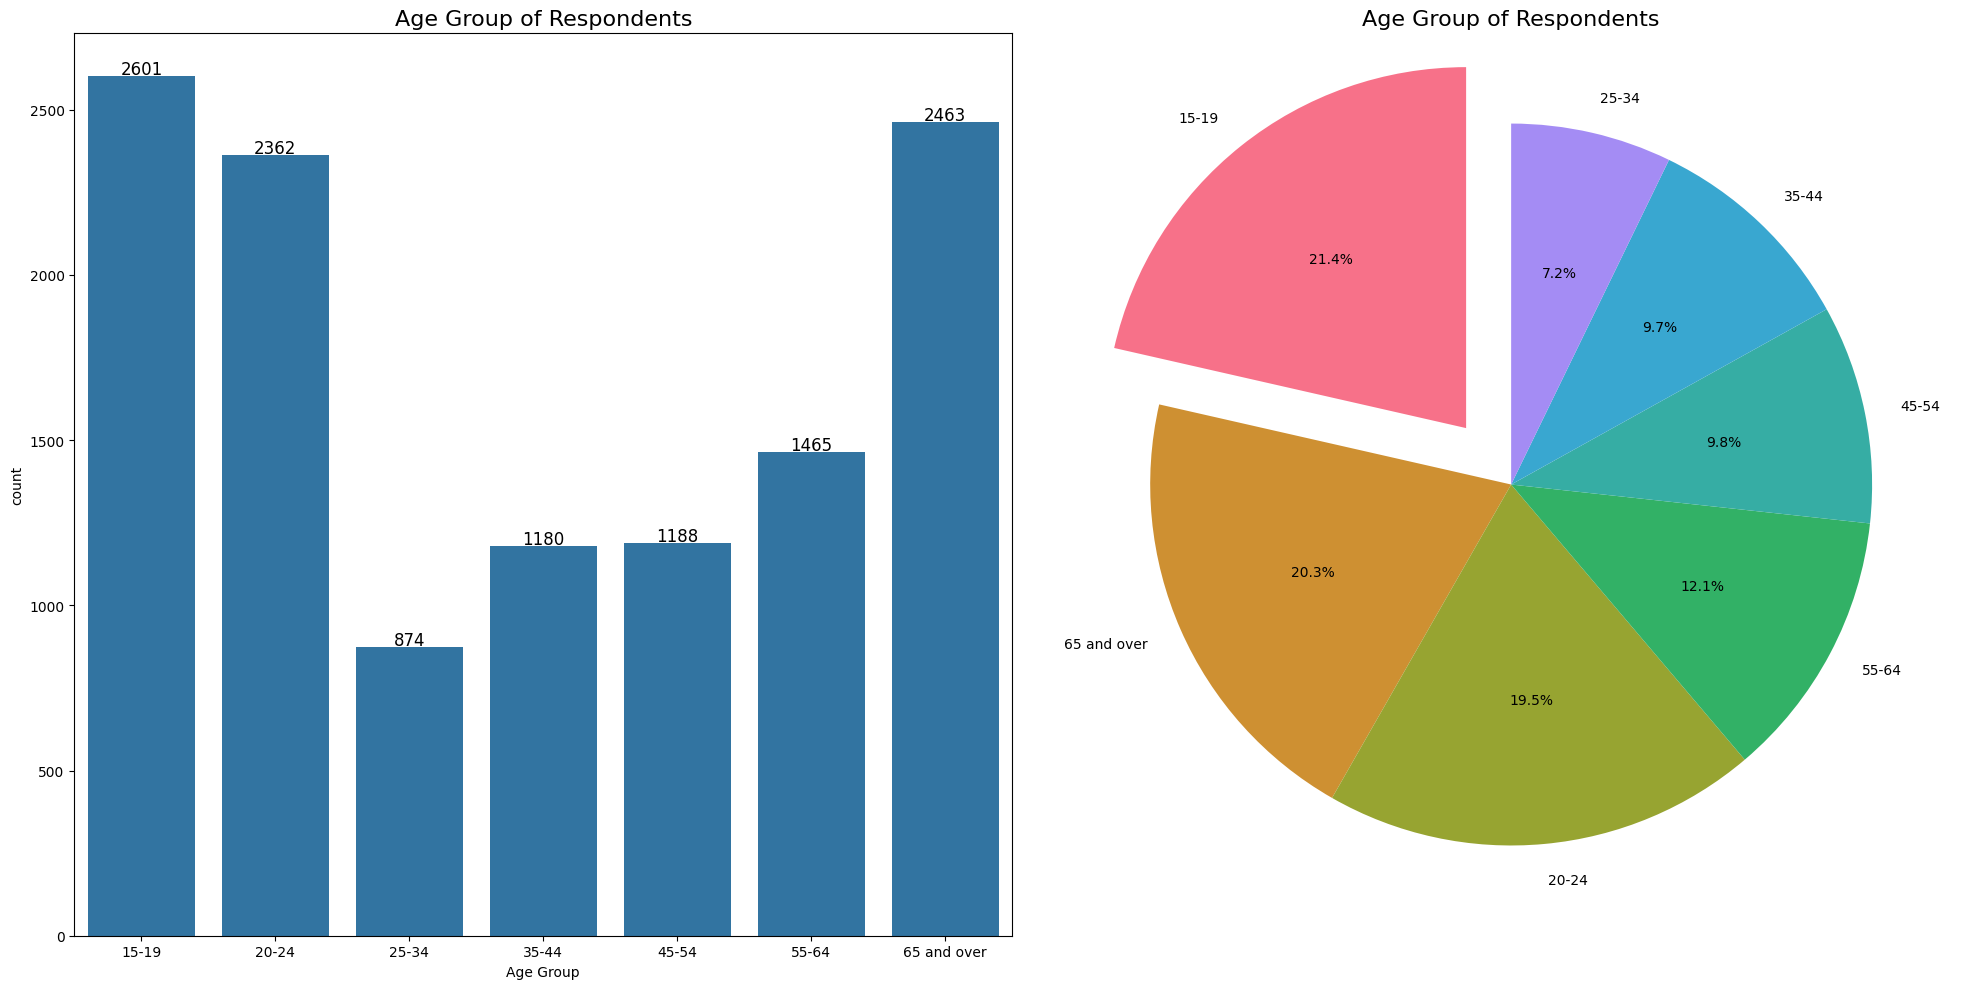

In [4160]:
# Respondents (Agegroup)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Age Group", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticklabels(["15-19", "20-24","25-34","35-44","45-54","55-64","65 and over"]) 
plt.title('Age Group of Respondents', fontsize=16)

plt.subplot(1,2,2)
Age_group_counts = data["Age Group"].value_counts()
# Plot the pie chart
plt.pie(Age_group_counts, labels=["15-19", "65 and over", "20-24", "55-64", "45-54","35-44", "25-34"], autopct='%1.1f%%',startangle=90,explode = [0.2,0,0,0,0,0,0], colors = sns.color_palette("husl", 8))
plt.title('Age Group of Respondents', fontsize=16)


plt.tight_layout()
plt.show()

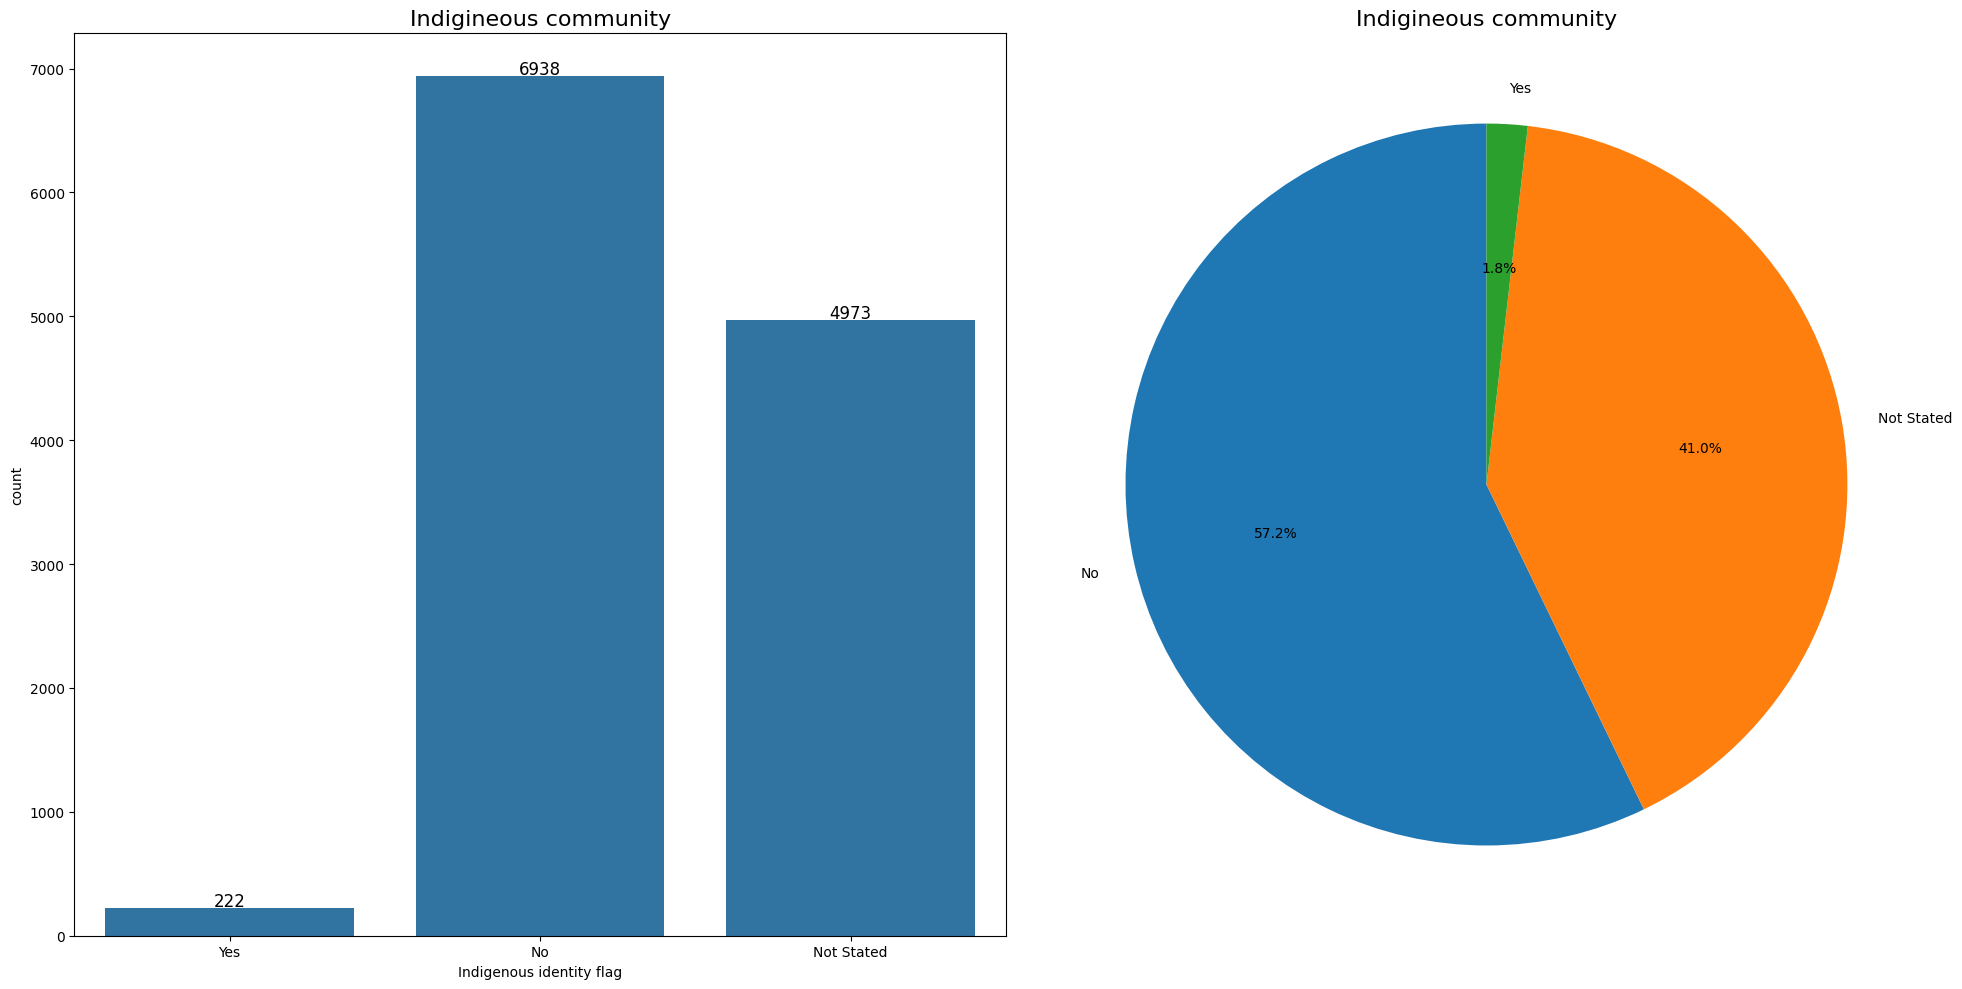

In [ ]:
# Respondents (indigeneous flag)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Indigenous identity flag", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticks([0, 1,2]) 
ax.set_xticklabels(["Yes", "No","Not Stated"]) 
plt.title('Indigineous community', fontsize=16)

plt.subplot(1,2,2)
Ind_counts = data["Indigenous identity flag"].value_counts()
# Plot the pie chart
plt.pie(Ind_counts, labels=["No","Not Stated","Yes"], autopct='%1.1f%%',startangle=90)
plt.title('Indigineous community', fontsize=16)


plt.tight_layout()
plt.show()

## CORRELATION (Demographic features and target variable)

In [4163]:
# for correlation lets use cramers(nominal) categorical values

In [4164]:
data=data[data["Smoking Status (3 levels)"].isin([1,2])]

In [4165]:
data

,Random ID,Smoked a cigarette - lifetime,Age first time smoked whole cigarette,Frequency smoked cigarettes - past 30 days,Days smoked per week - past 30 days,Smoked at least 100 cigarettes - lifetime,When stopped smoking cigarettes,Month stopped smoking,Number of cigarettes smoked - Day 1,Number of cigarettes smoked - Day 2,...,Vaped in the past 30 days (2 levels),Vaped in the past 30 days (3 levels),Cannabis smoked in the past 30 days (3 levels),Vaped cannabis in the past 30 days (2 levels),Vaped cannabis in the past 30 days (3 levels),First product tried,Consumed alcohol in the past 30 days,Cannabis smoked in the past 30 days (2 levels),Survey weight - PUMF,Date of file creation
16,65199,1,3,2,2,1,6,96,0,1,...,2,3,1,2,3,3,1,1,6025.85,1-Feb-24
17,65200,1,1,1,6,1,6,96,2,2,...,2,3,3,2,3,9,2,2,8807.62,1-Feb-24
20,65203,1,2,4,6,1,3,96,96,96,...,2,3,3,2,3,1,2,2,721.10,1-Feb-24
22,65205,1,2,4,6,1,3,96,96,96,...,2,3,3,2,3,1,1,2,3746.68,1-Feb-24
23,65206,1,2,1,6,1,6,96,0,0,...,2,3,3,2,3,1,1,2,439.21,1-Feb-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12122,77305,1,3,4,6,1,3,96,96,96,...,2,3,3,2,3,1,1,2,2789.84,1-Feb-24
12127,77310,1,2,4,6,1,3,96,96,96,...,2,3,3,2,3,1,1,2,2474.72,1-Feb-24
12129,77312,1,2,4,6,1,3,96,96,96,...,2,3,3,2,3,1,1,2,1494.33,1-Feb-24
12130,77313,1,2,4,6,1,3,96,96,96,...,1,1,1,1,1,3,1,1,1728.73,1-Feb-24


In [4166]:
#cramer's fn
# Function to calculate Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

In [4167]:
dem_data=data[Dem_var]

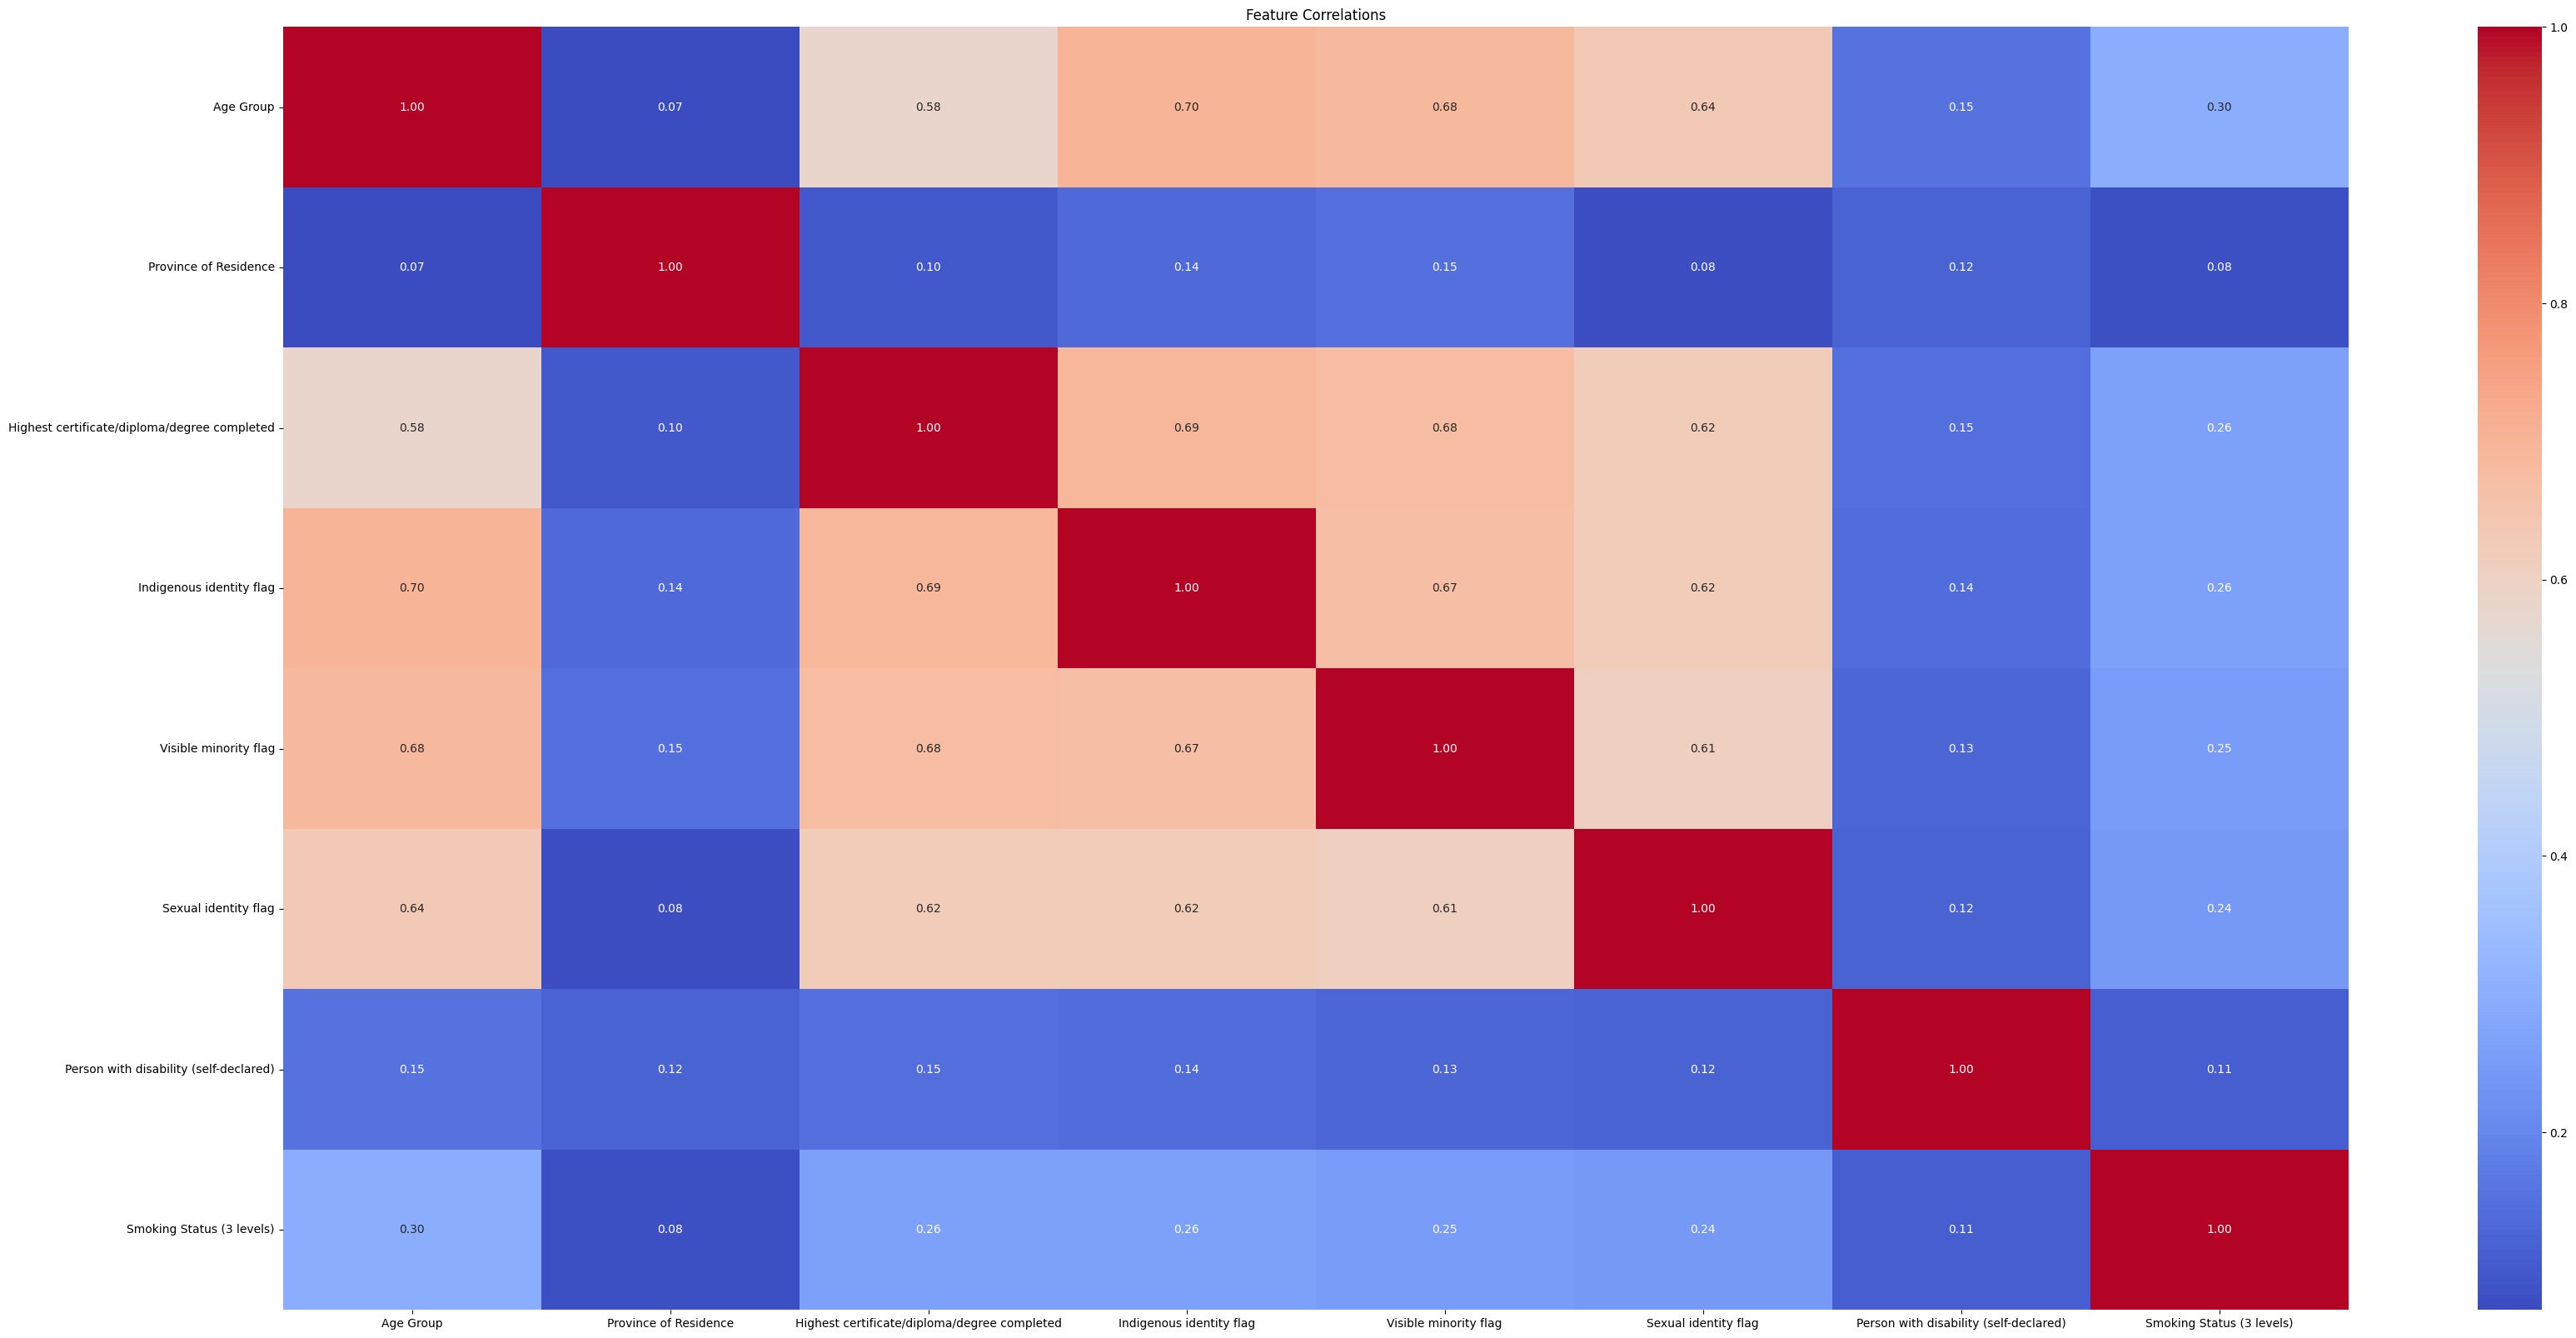

In [4168]:
# Convert categorical columns to numeric if necessary
dem_data_numeric = dem_data.select_dtypes(include=["number"])

cols = dem_data_numeric.columns

cv_arr = np.zeros((len(cols), len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cv_arr[i,j] = cramers_v(dem_data_numeric[cols[i]], dem_data_numeric[cols[j]])

plt.figure(figsize=(40, 20))
sns.heatmap(pd.DataFrame(cv_arr, columns = cols, index = cols), annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

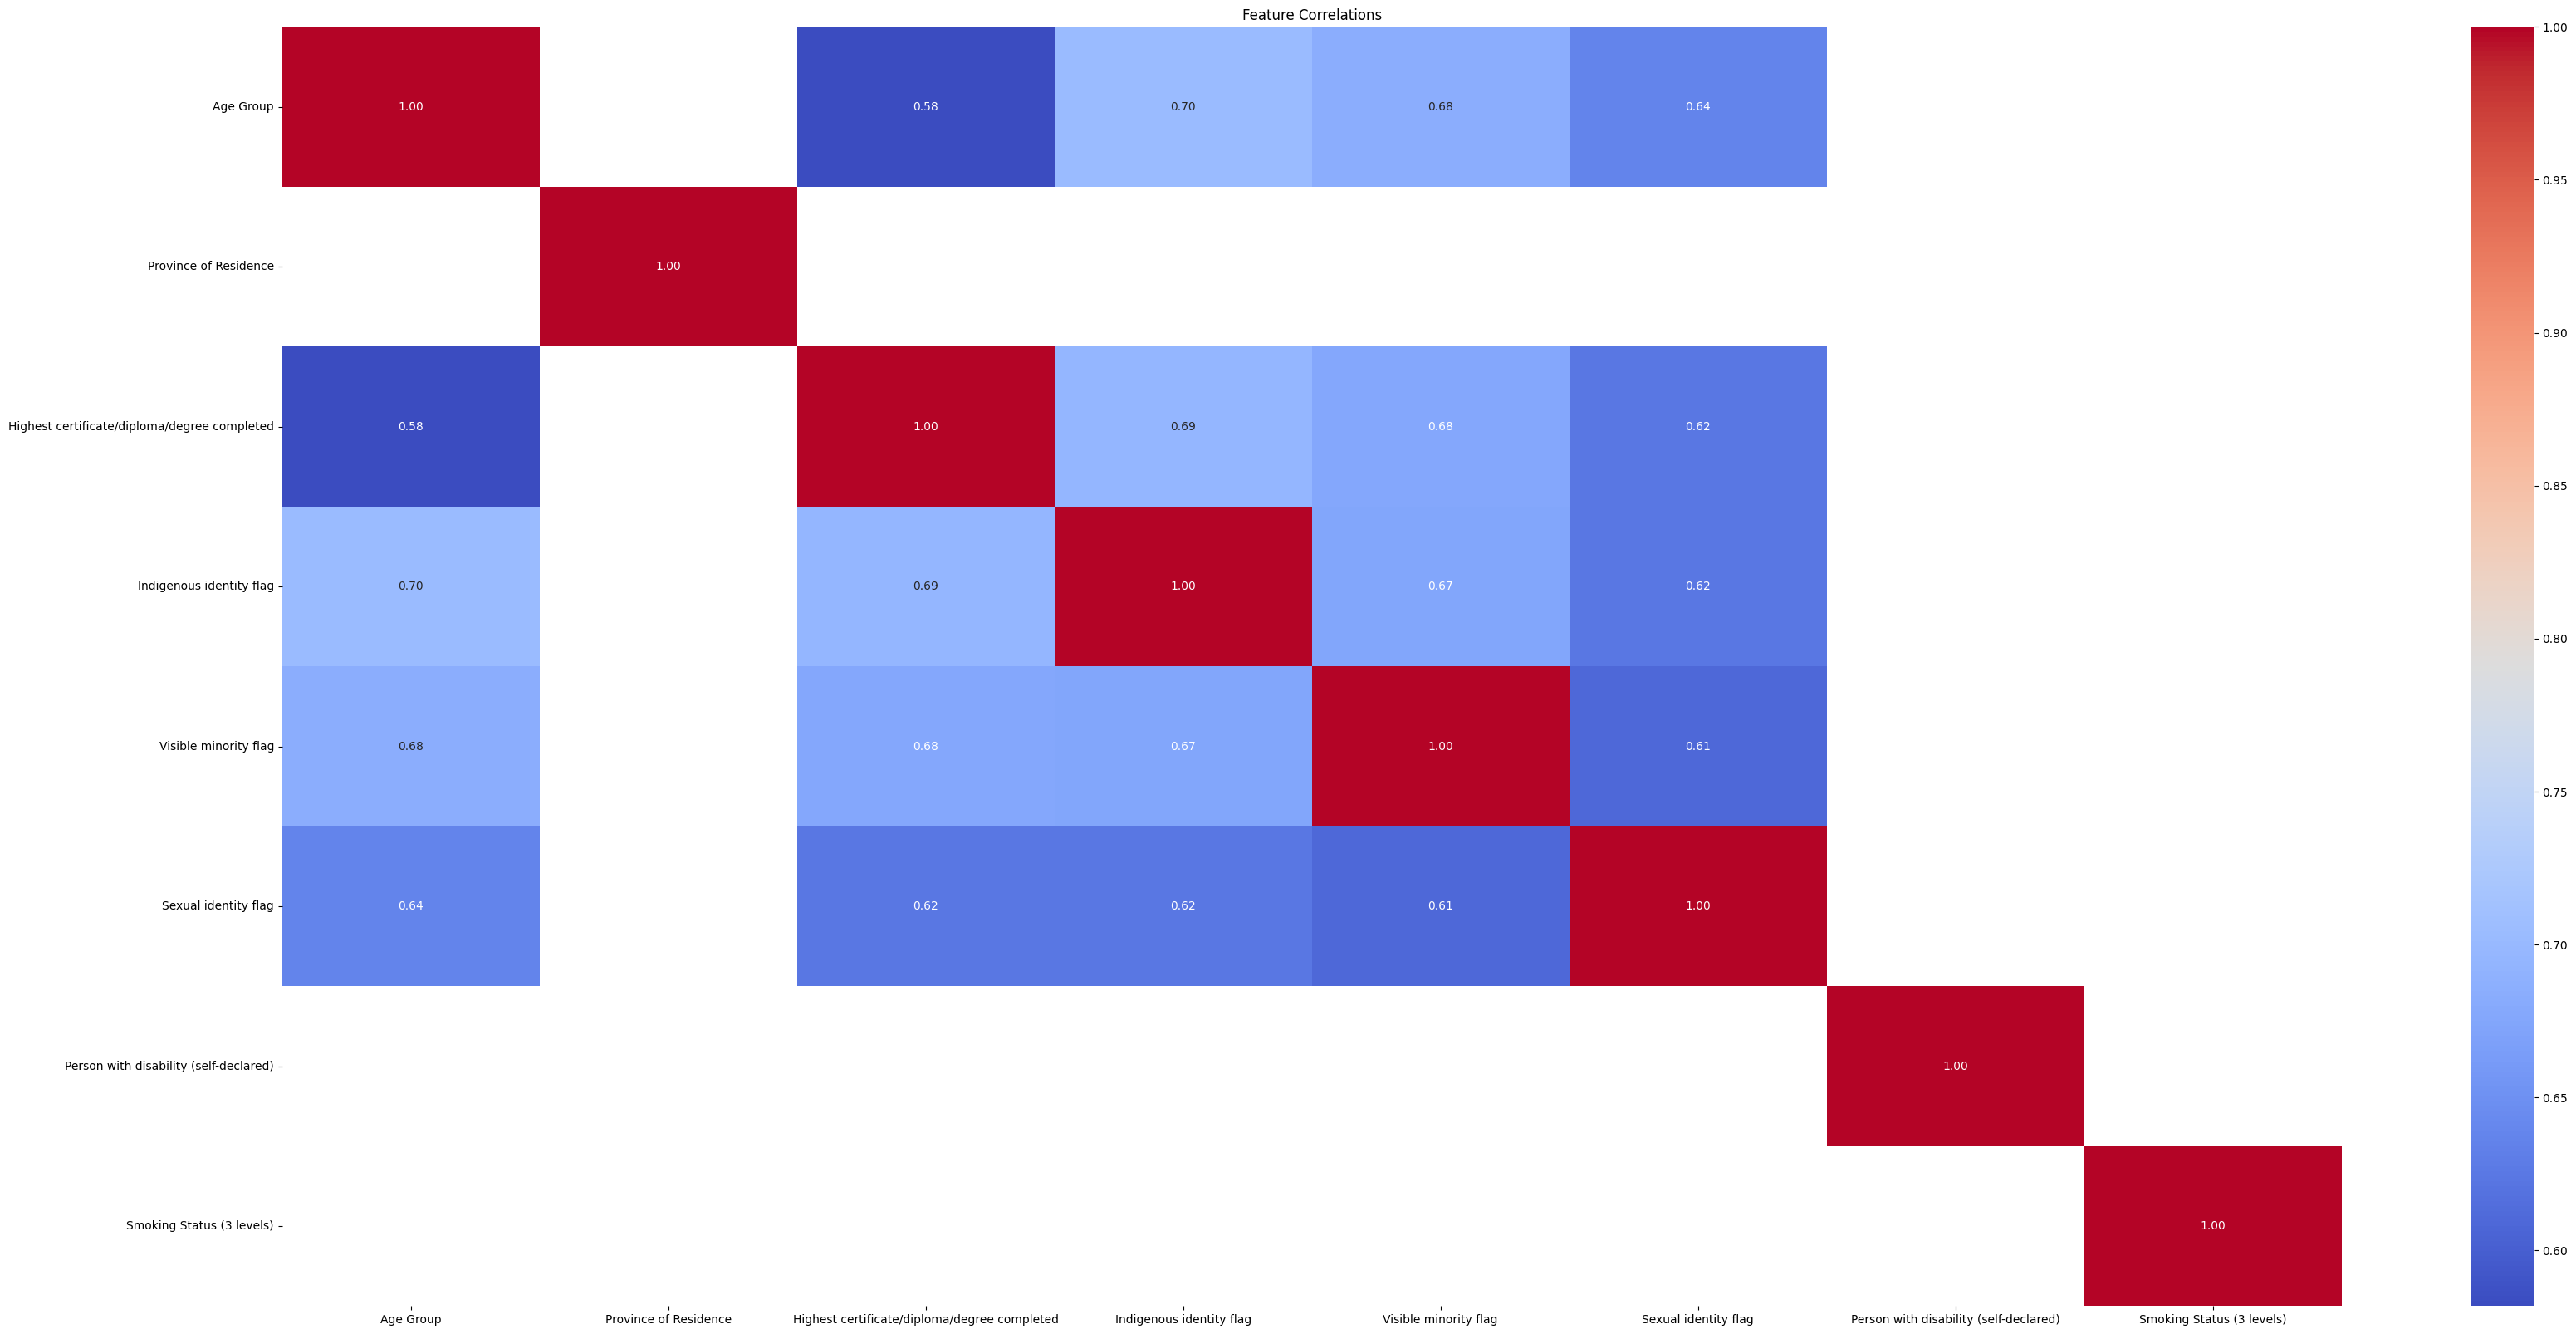

In [4169]:
cv_data = pd.DataFrame(cv_arr, columns = cols, index = cols)
cv_data = cv_data[cv_data > 0.5]

plt.figure(figsize=(40, 20))
sns.heatmap(cv_data, annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

In [4170]:
dem_data_numeric.corr()["Smoking Status (3 levels)"]

Age Group                                       0.281946
Province of Residence                          -0.040950
Highest certificate/diploma/degree completed   -0.221868
Indigenous identity flag                       -0.257849
Visible minority flag                          -0.236311
Sexual identity flag                           -0.241572
Person with disability (self-declared)         -0.083800
Smoking Status (3 levels)                       1.000000
Name: Smoking Status (3 levels), dtype: float64

In [4171]:
# Age group, Highest certificate/diploma/degree completed,Indigenous identity flag,Visible minority flag,Sexual identity flag  has the most correlation between smoking status

# Tobacco Consumption Behaviours

In [4172]:
# tobacco use behaviours
#lets remove the three dependent variables from the data
# the other variables such as number of cigarettes smokd in past 7 days are removed as those can influence the model

In [4173]:
tob_features=[#'Smoked a cigarette - lifetime',
       #'Age first time smoked whole cigarette',
       'Frequency smoked cigarettes - past 30 days',
       'Days smoked per week - past 30 days',
       'Smoked at least 100 cigarettes - lifetime',
       'When stopped smoking cigarettes', 'Month stopped smoking',
       'Number of cigarettes smoked - Day 1',
       'Number of cigarettes smoked - Day 2',
       'Number of cigarettes smoked - Day 3',
       'Number of cigarettes smoked - Day 4',
       'Number of cigarettes smoked - Day 5',
       'Number of cigarettes smoked - Day 6',
       'Number of cigarettes smoked - Day 7',
       #'Times stopped smoking - past 12 months',
       #'Tried quitting by switching to vaping',
       #'Used vaping device with nicotine',
       #'Used vaping device without nicotine/unknown',
       #'Did to quit smoking - Deal with friend/family or used app',
       #'Did to quit smoking - Reduced cigarettes smoked',
       #'Did to quit smoking - Tried to quit on own',
       #'Did to quit smoking - Other', 'Used nicotine replacement products',
       'Frequency smoked - Little cigars/cigarillos - past 30 days',
       'Frequency smoked - Cigars - past 30 days',
       'Frequency smoked - Tobacco in traditional pipe - past 30 days',
       'Frequency smoked - Chewing tobacco/snuff - past 30 days',
       'Frequency smoked - Tobacco water-pipe - past 30 days','Smoking Status (3 levels)']

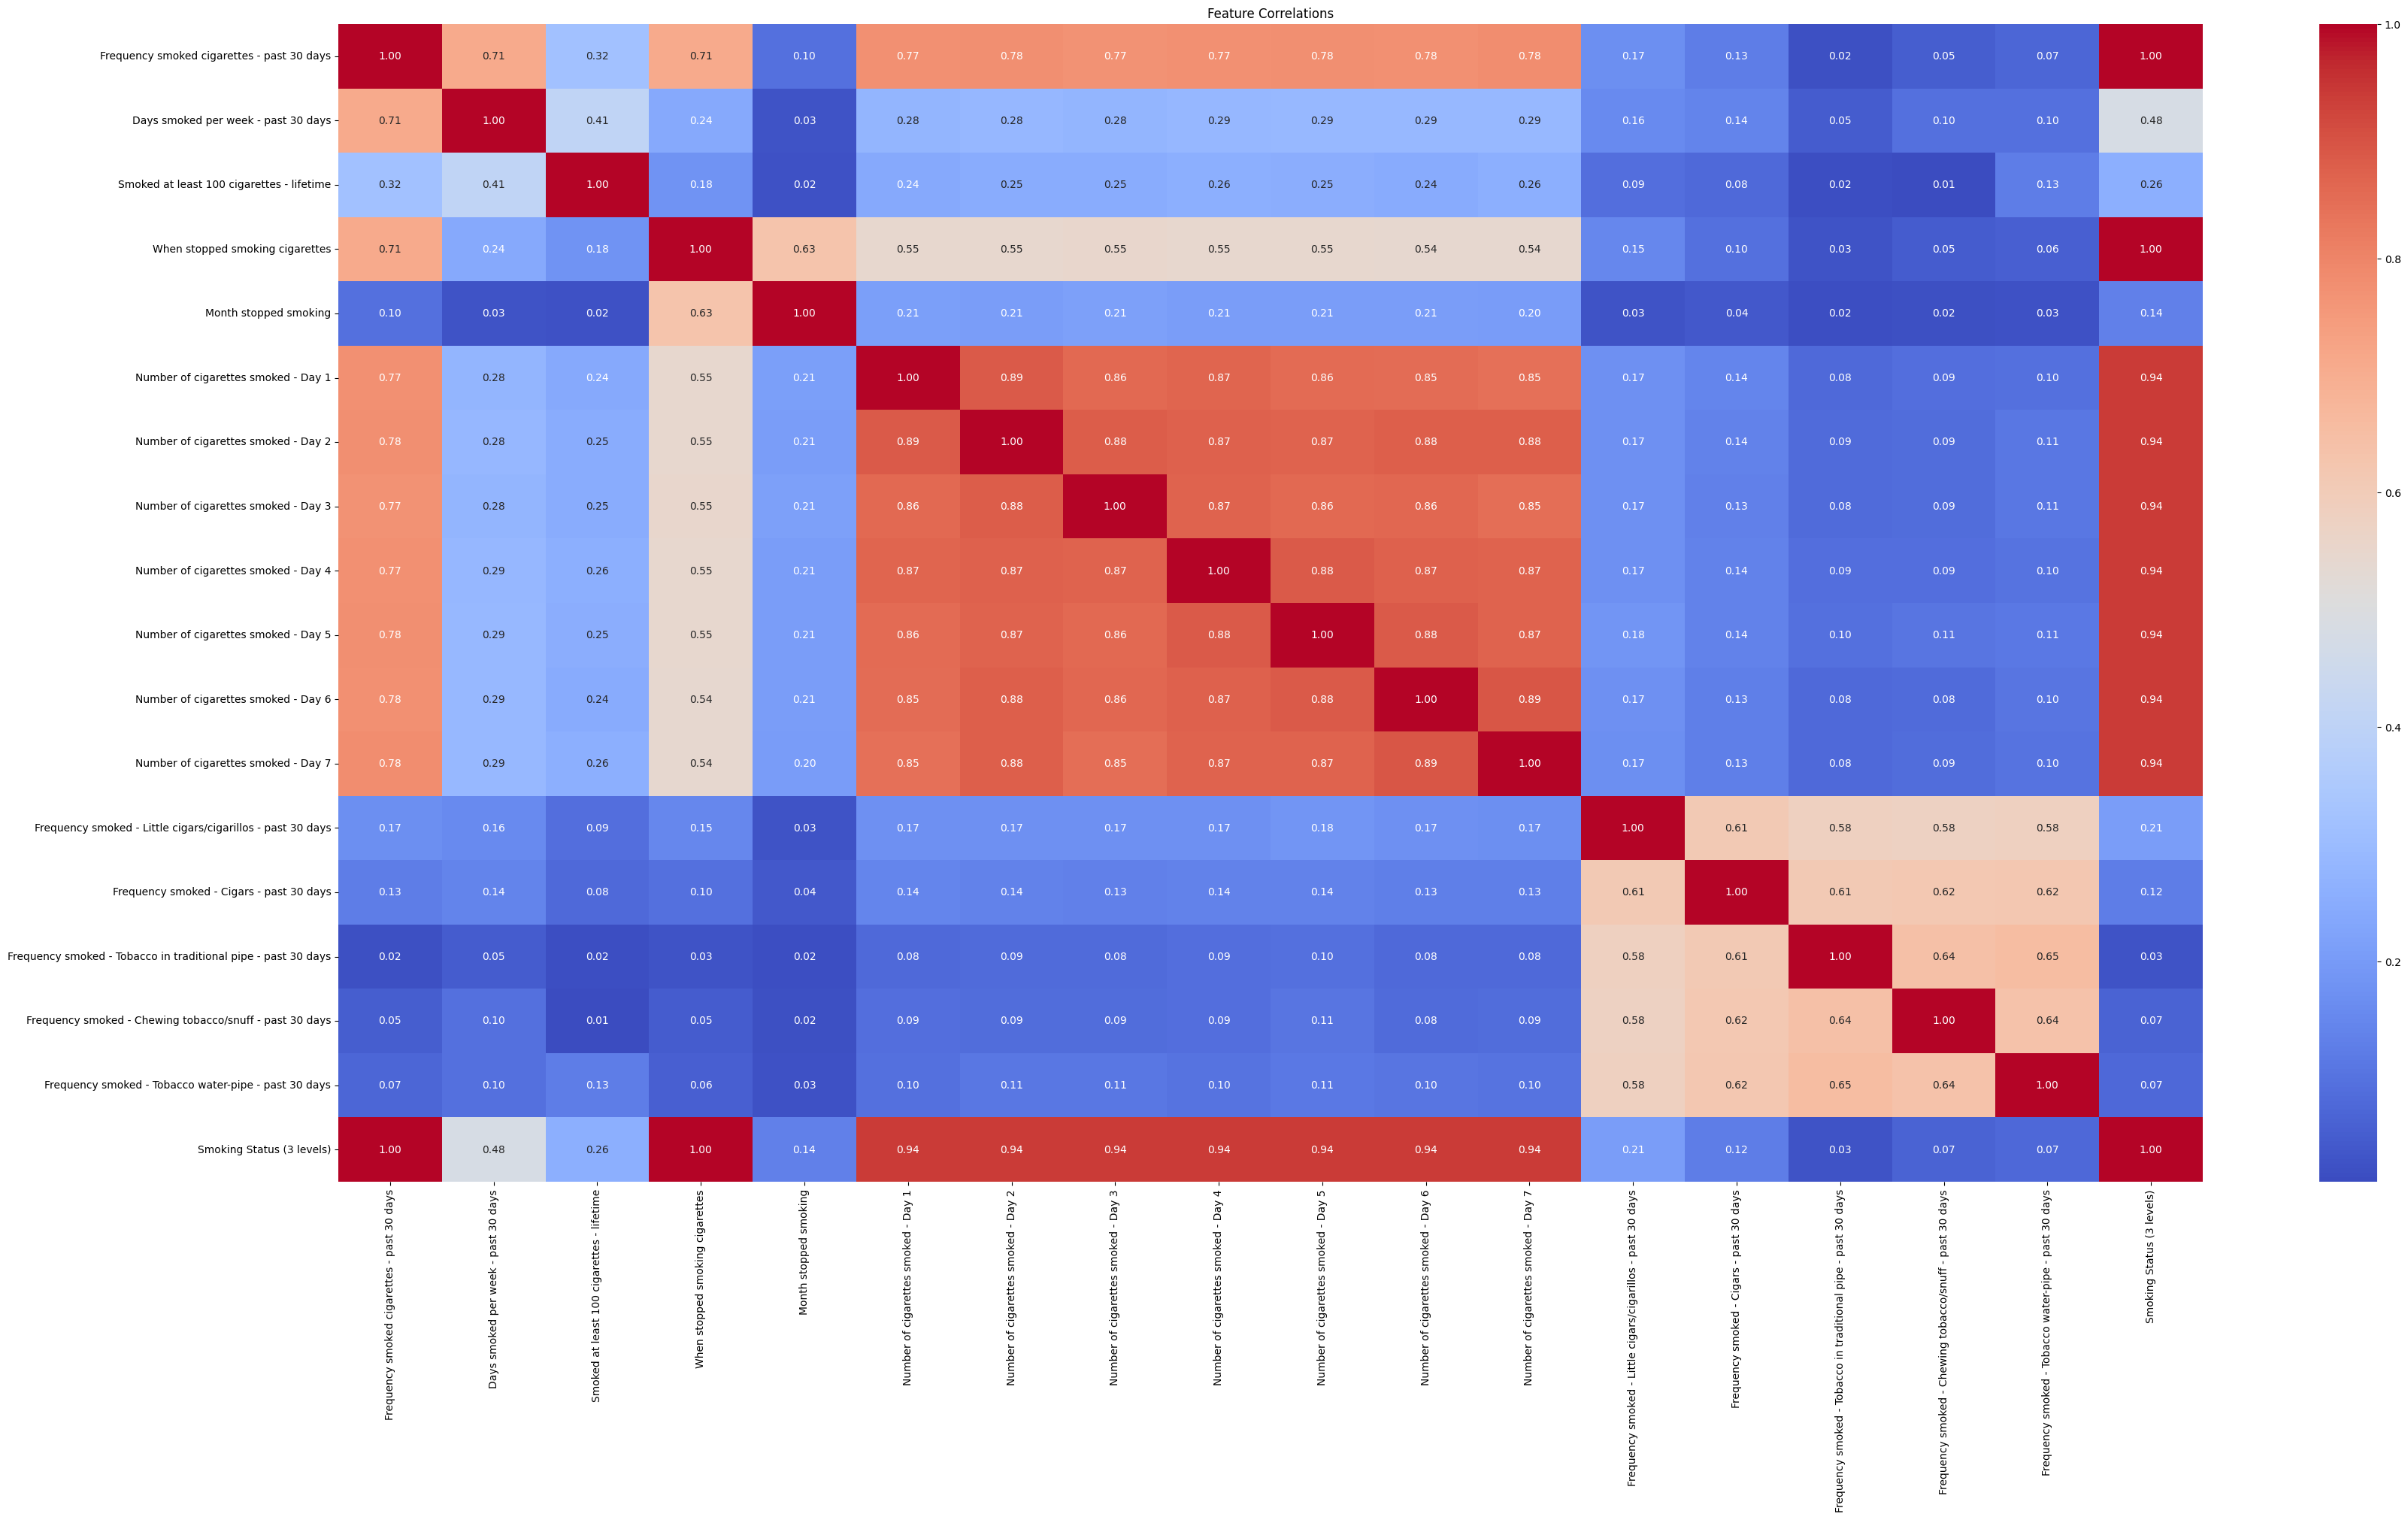

In [4174]:


tob_data=data[tob_features]

# Convert categorical columns to numeric if necessary
tob_data_numeric = tob_data.select_dtypes(include=["number"])
cols = tob_data_numeric.columns

cv_arr = np.zeros((len(cols), len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cv_arr[i,j] = cramers_v(tob_data_numeric[cols[i]], tob_data_numeric[cols[j]])

plt.figure(figsize=(40, 20))
sns.heatmap(pd.DataFrame(cv_arr, columns = cols, index = cols), annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

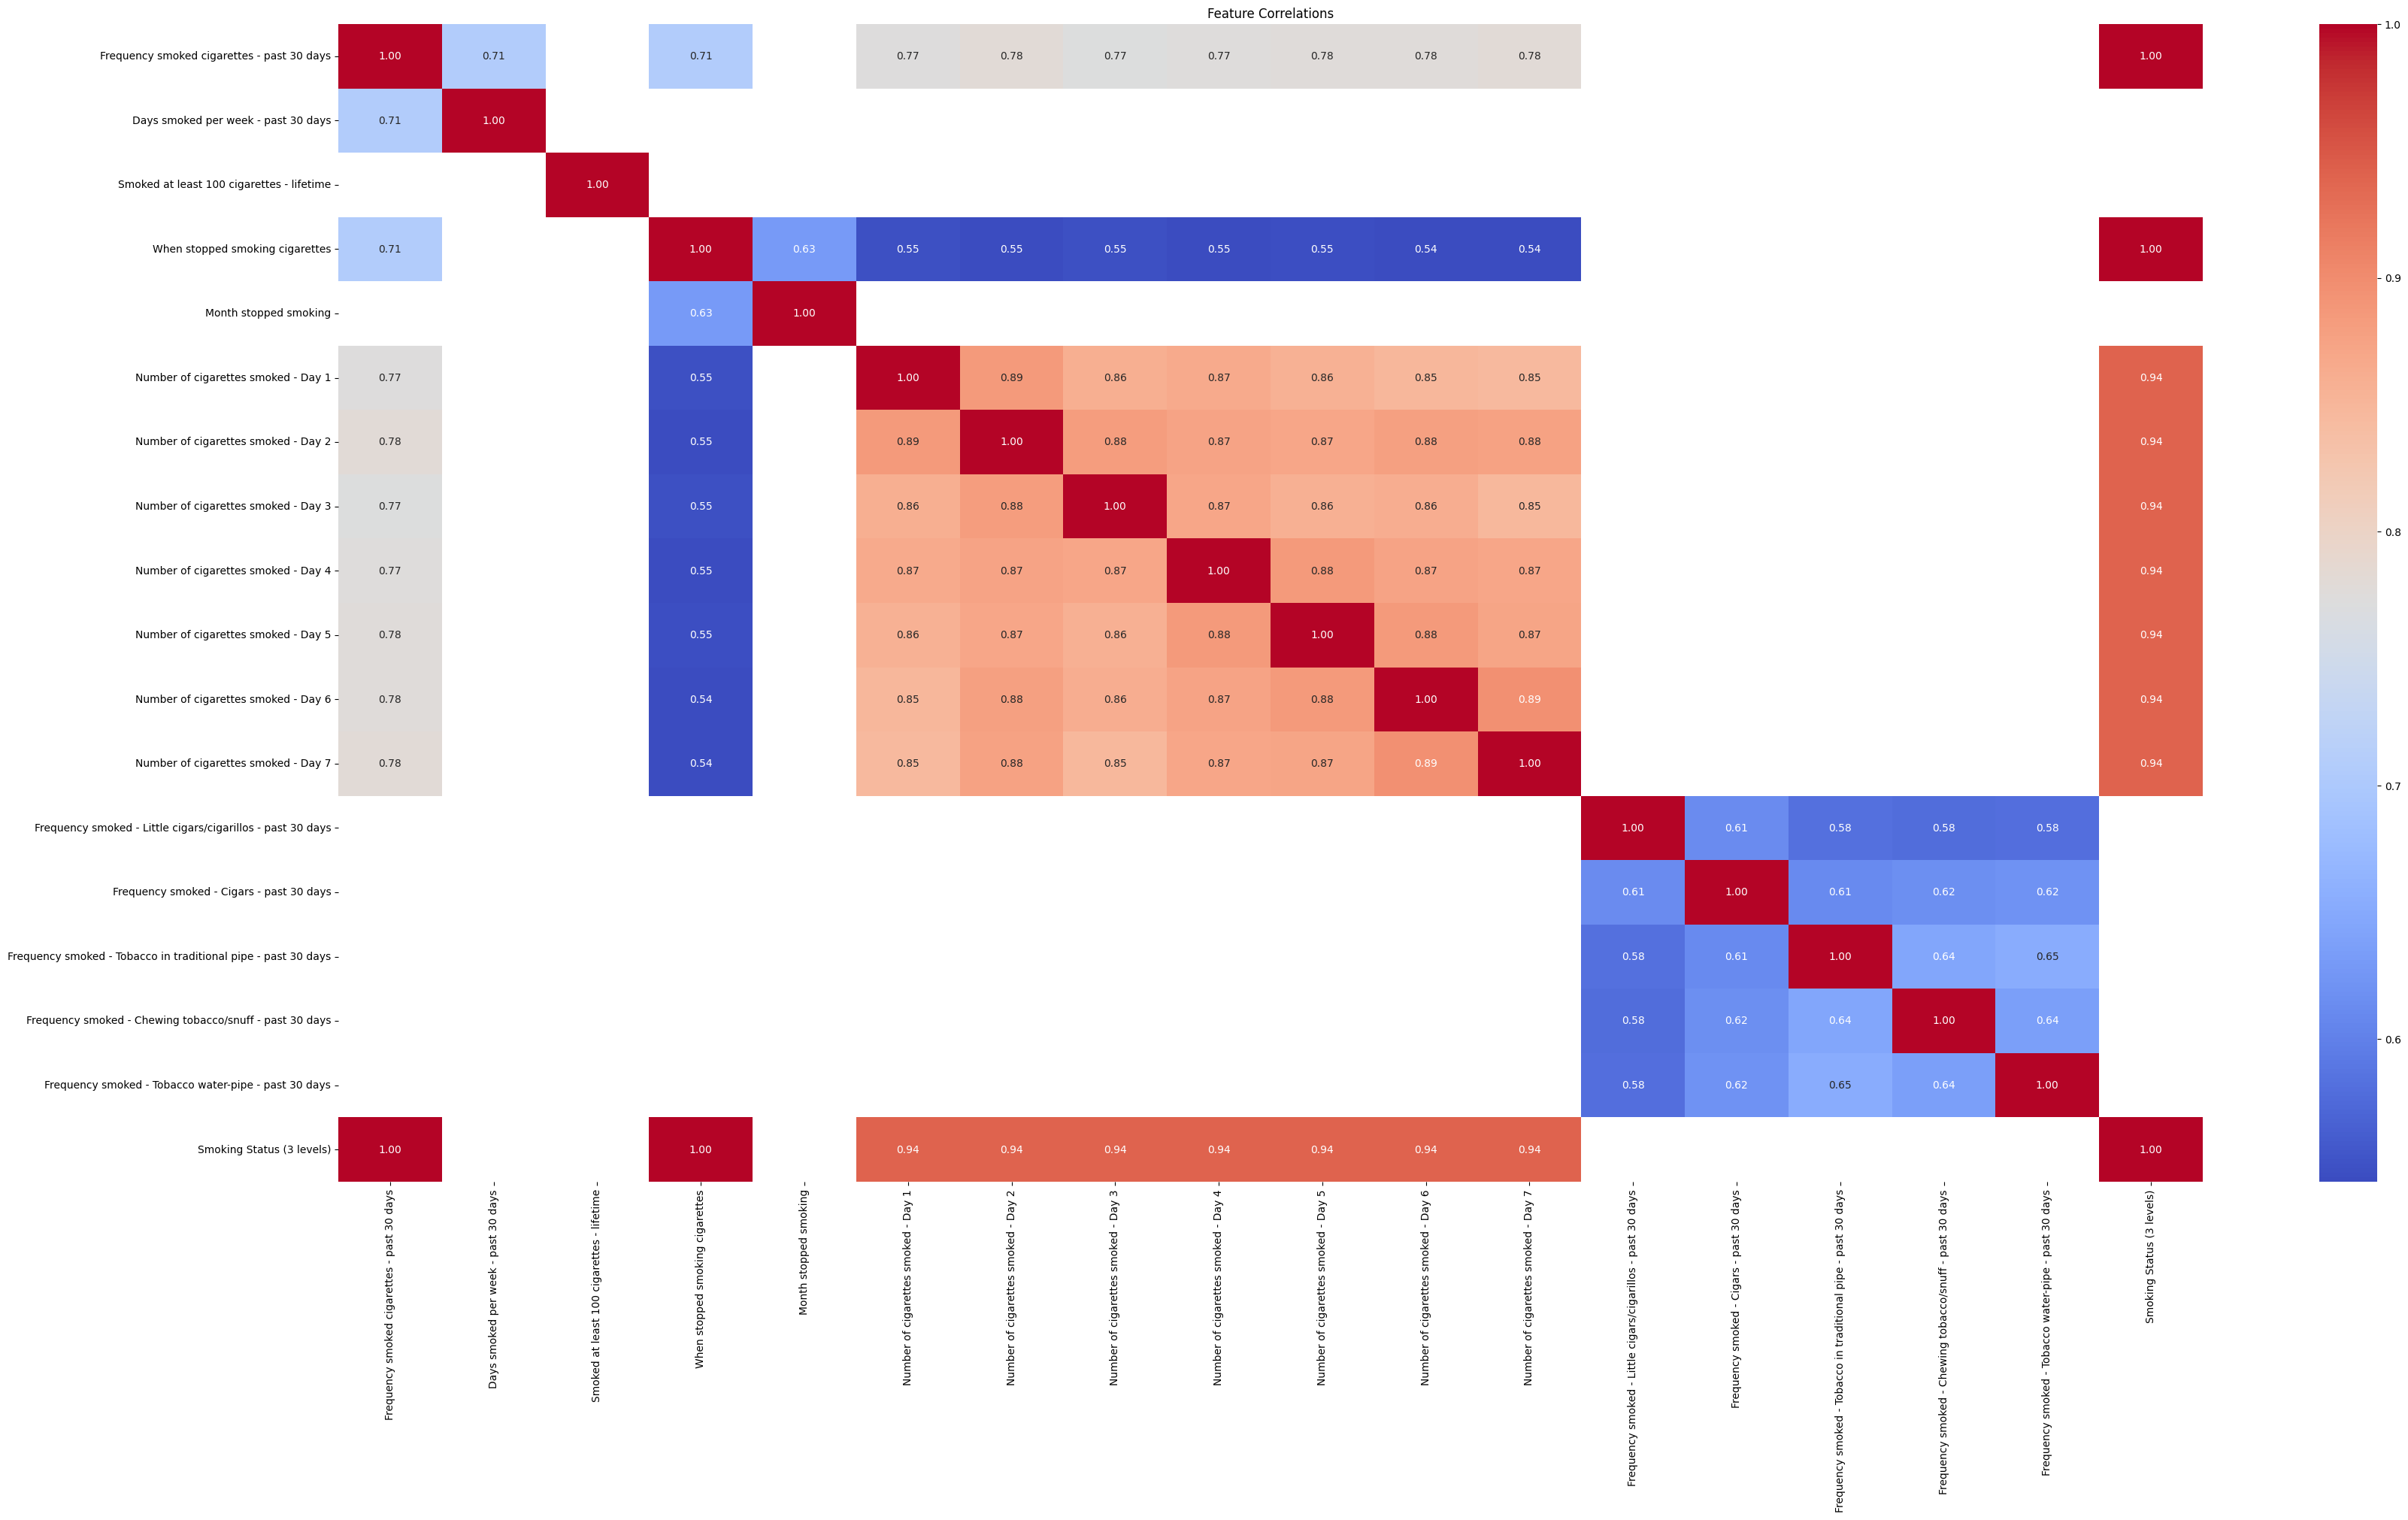

In [4175]:
cv_data = pd.DataFrame(cv_arr, columns = cols, index = cols)
cv_data = cv_data[cv_data > 0.5]

plt.figure(figsize=(40, 20))
sns.heatmap(cv_data, annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

In [4176]:
tob_features=[#'Smoked a cigarette - lifetime',
       'Age first time smoked whole cigarette',
       #'Frequency smoked cigarettes - past 30 days',
       #'Days smoked per week - past 30 days',
       #'Smoked at least 100 cigarettes - lifetime',
       #'When stopped smoking cigarettes', 'Month stopped smoking',
       #'Number of cigarettes smoked - Day 1',
       #'Number of cigarettes smoked - Day 2',
       #'Number of cigarettes smoked - Day 3',
       #'Number of cigarettes smoked - Day 4',
       #'Number of cigarettes smoked - Day 5',
       #'Number of cigarettes smoked - Day 6',
       #'Number of cigarettes smoked - Day 7',
       'Times stopped smoking - past 12 months',
       'Tried quitting by switching to vaping',
       'Used vaping device with nicotine',
       'Used vaping device without nicotine/unknown',
       'Did to quit smoking - Deal with friend/family or used app',
       'Did to quit smoking - Reduced cigarettes smoked',
       'Did to quit smoking - Tried to quit on own',
       'Did to quit smoking - Other', 'Used nicotine replacement products',
       #'Frequency smoked - Little cigars/cigarillos - past 30 days',
       #'Frequency smoked - Cigars - past 30 days',
       #'Frequency smoked - Tobacco in traditional pipe - past 30 days',
       #'Frequency smoked - Chewing tobacco/snuff - past 30 days',
       #'Frequency smoked - Tobacco water-pipe - past 30 days',
       'Smoking Status (3 levels)']

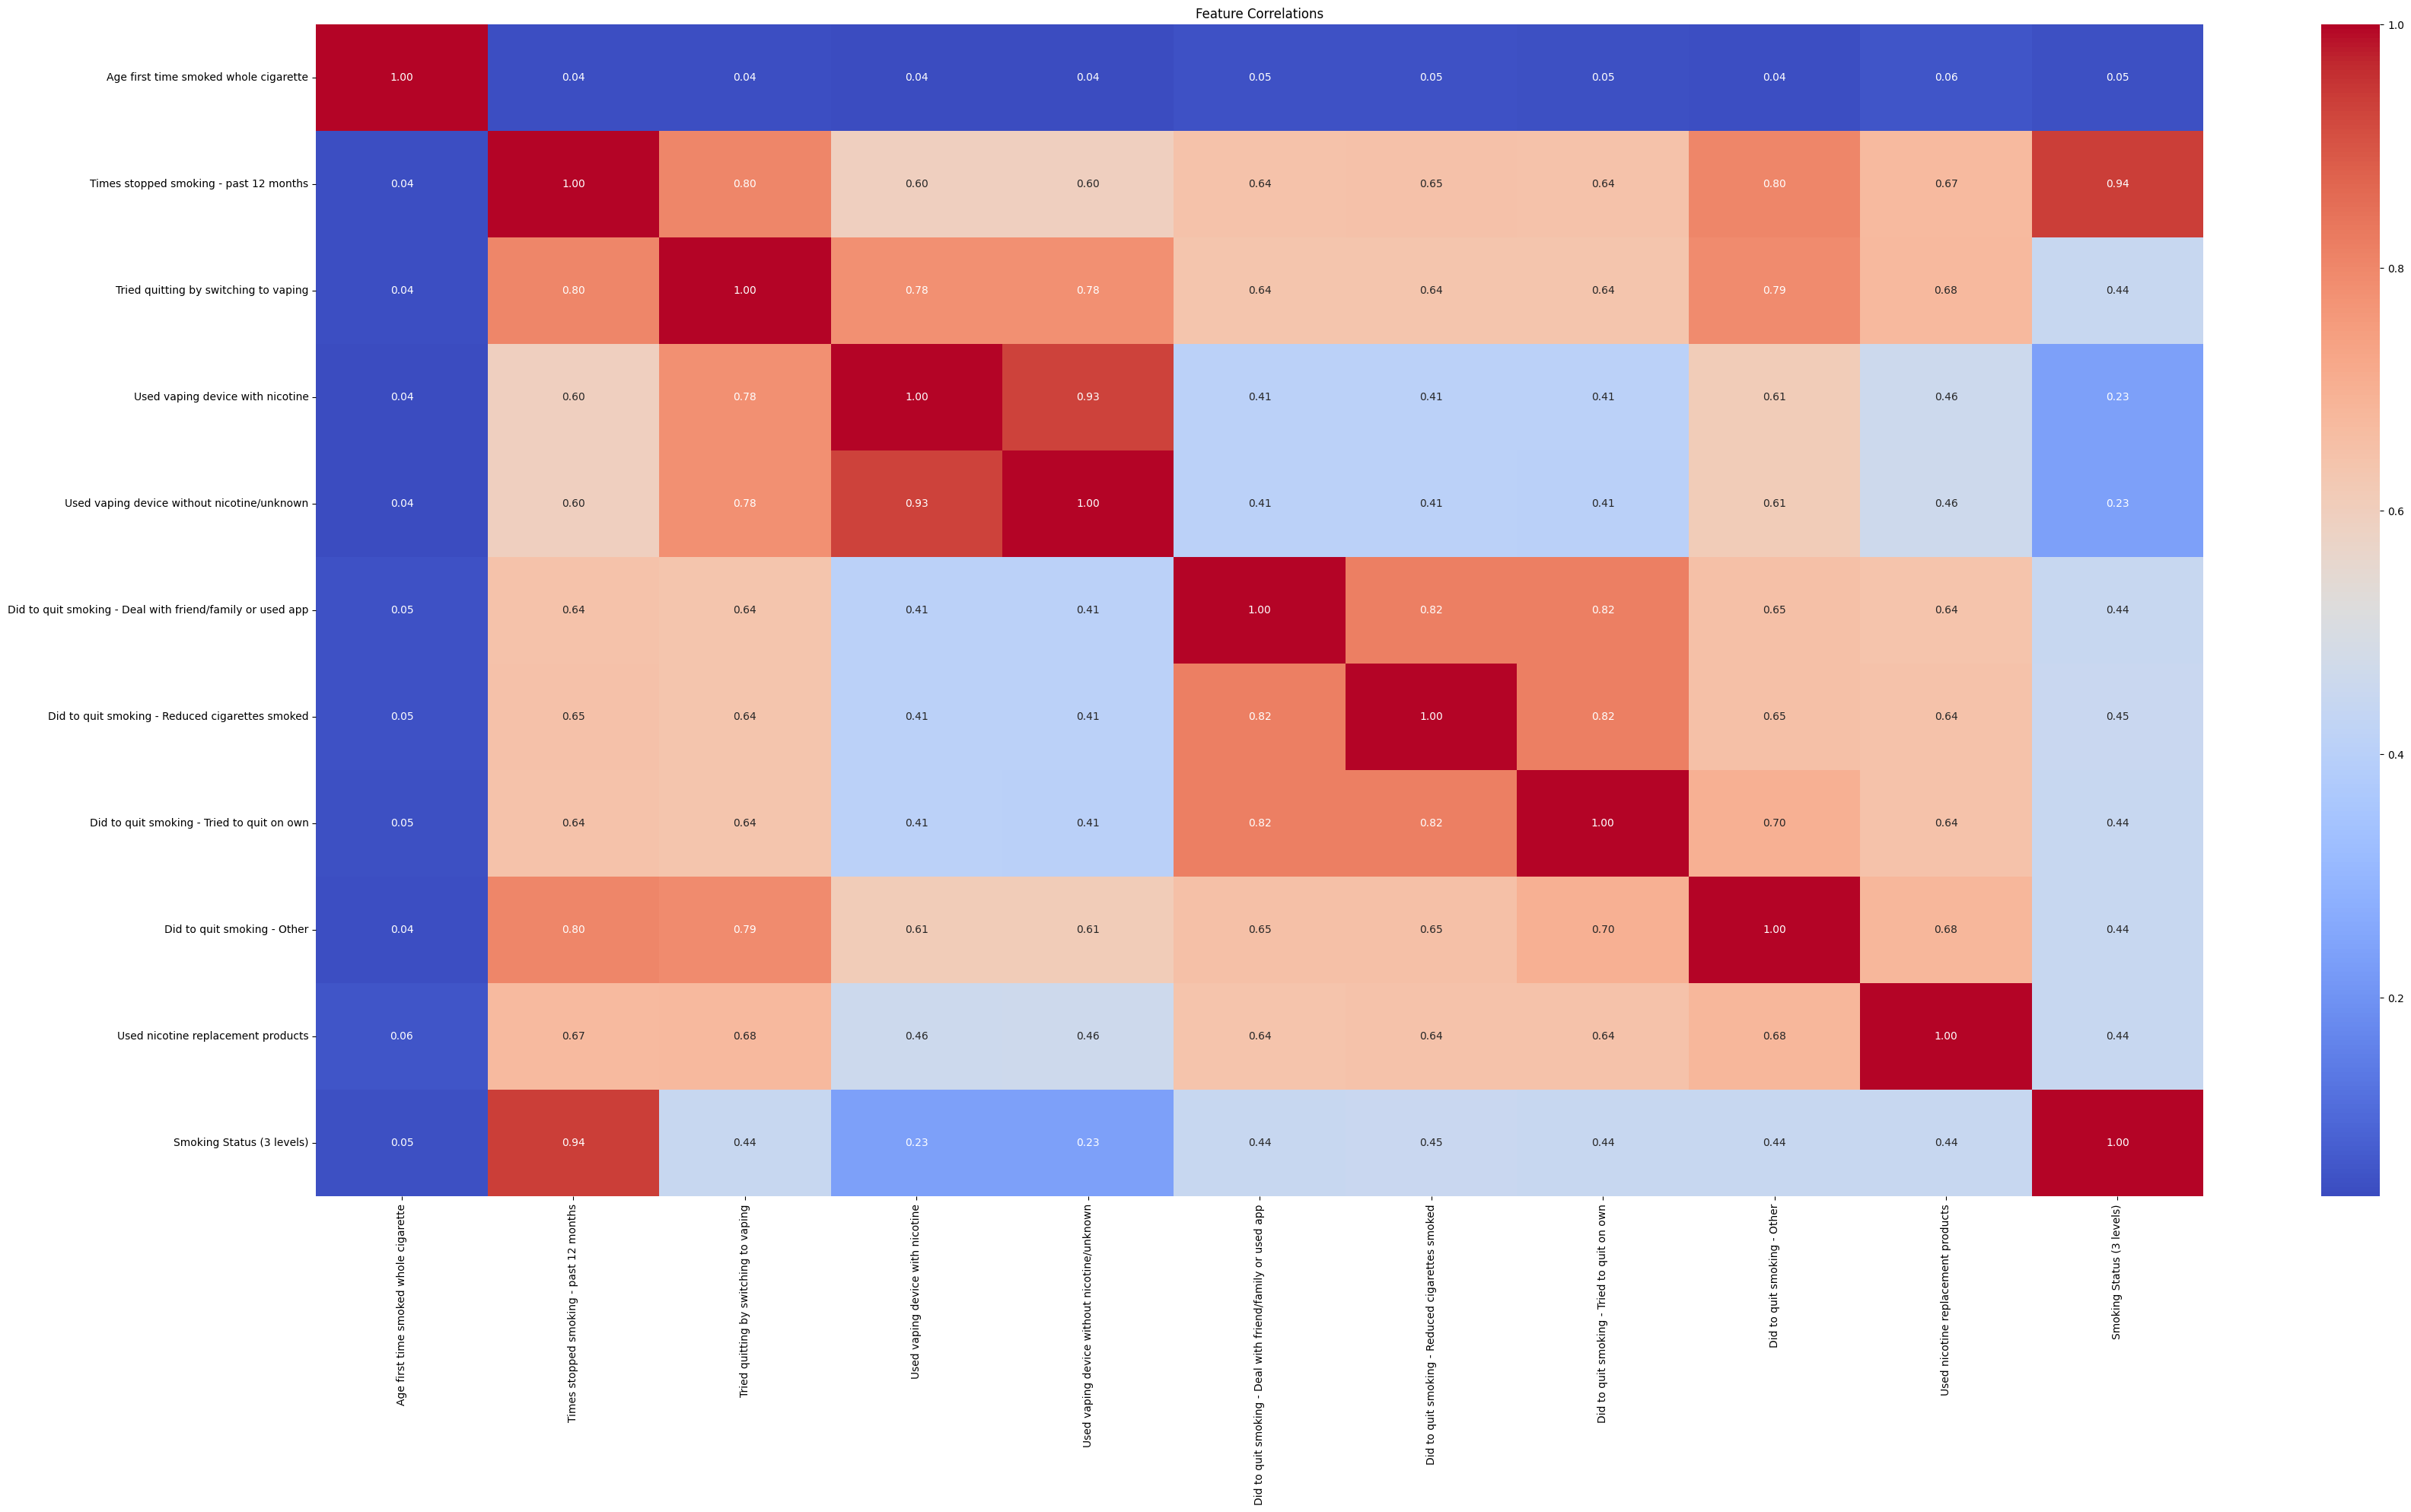

In [4177]:

tob_data=data[tob_features]
# Convert categorical columns to numeric if necessary
tob_data_numeric = tob_data.select_dtypes(include=["number"])

cols = tob_data_numeric.columns

cv_arr = np.zeros((len(cols), len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cv_arr[i,j] = cramers_v(tob_data_numeric[cols[i]], tob_data_numeric[cols[j]])

plt.figure(figsize=(40, 20))
sns.heatmap(pd.DataFrame(cv_arr, columns = cols, index = cols), annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

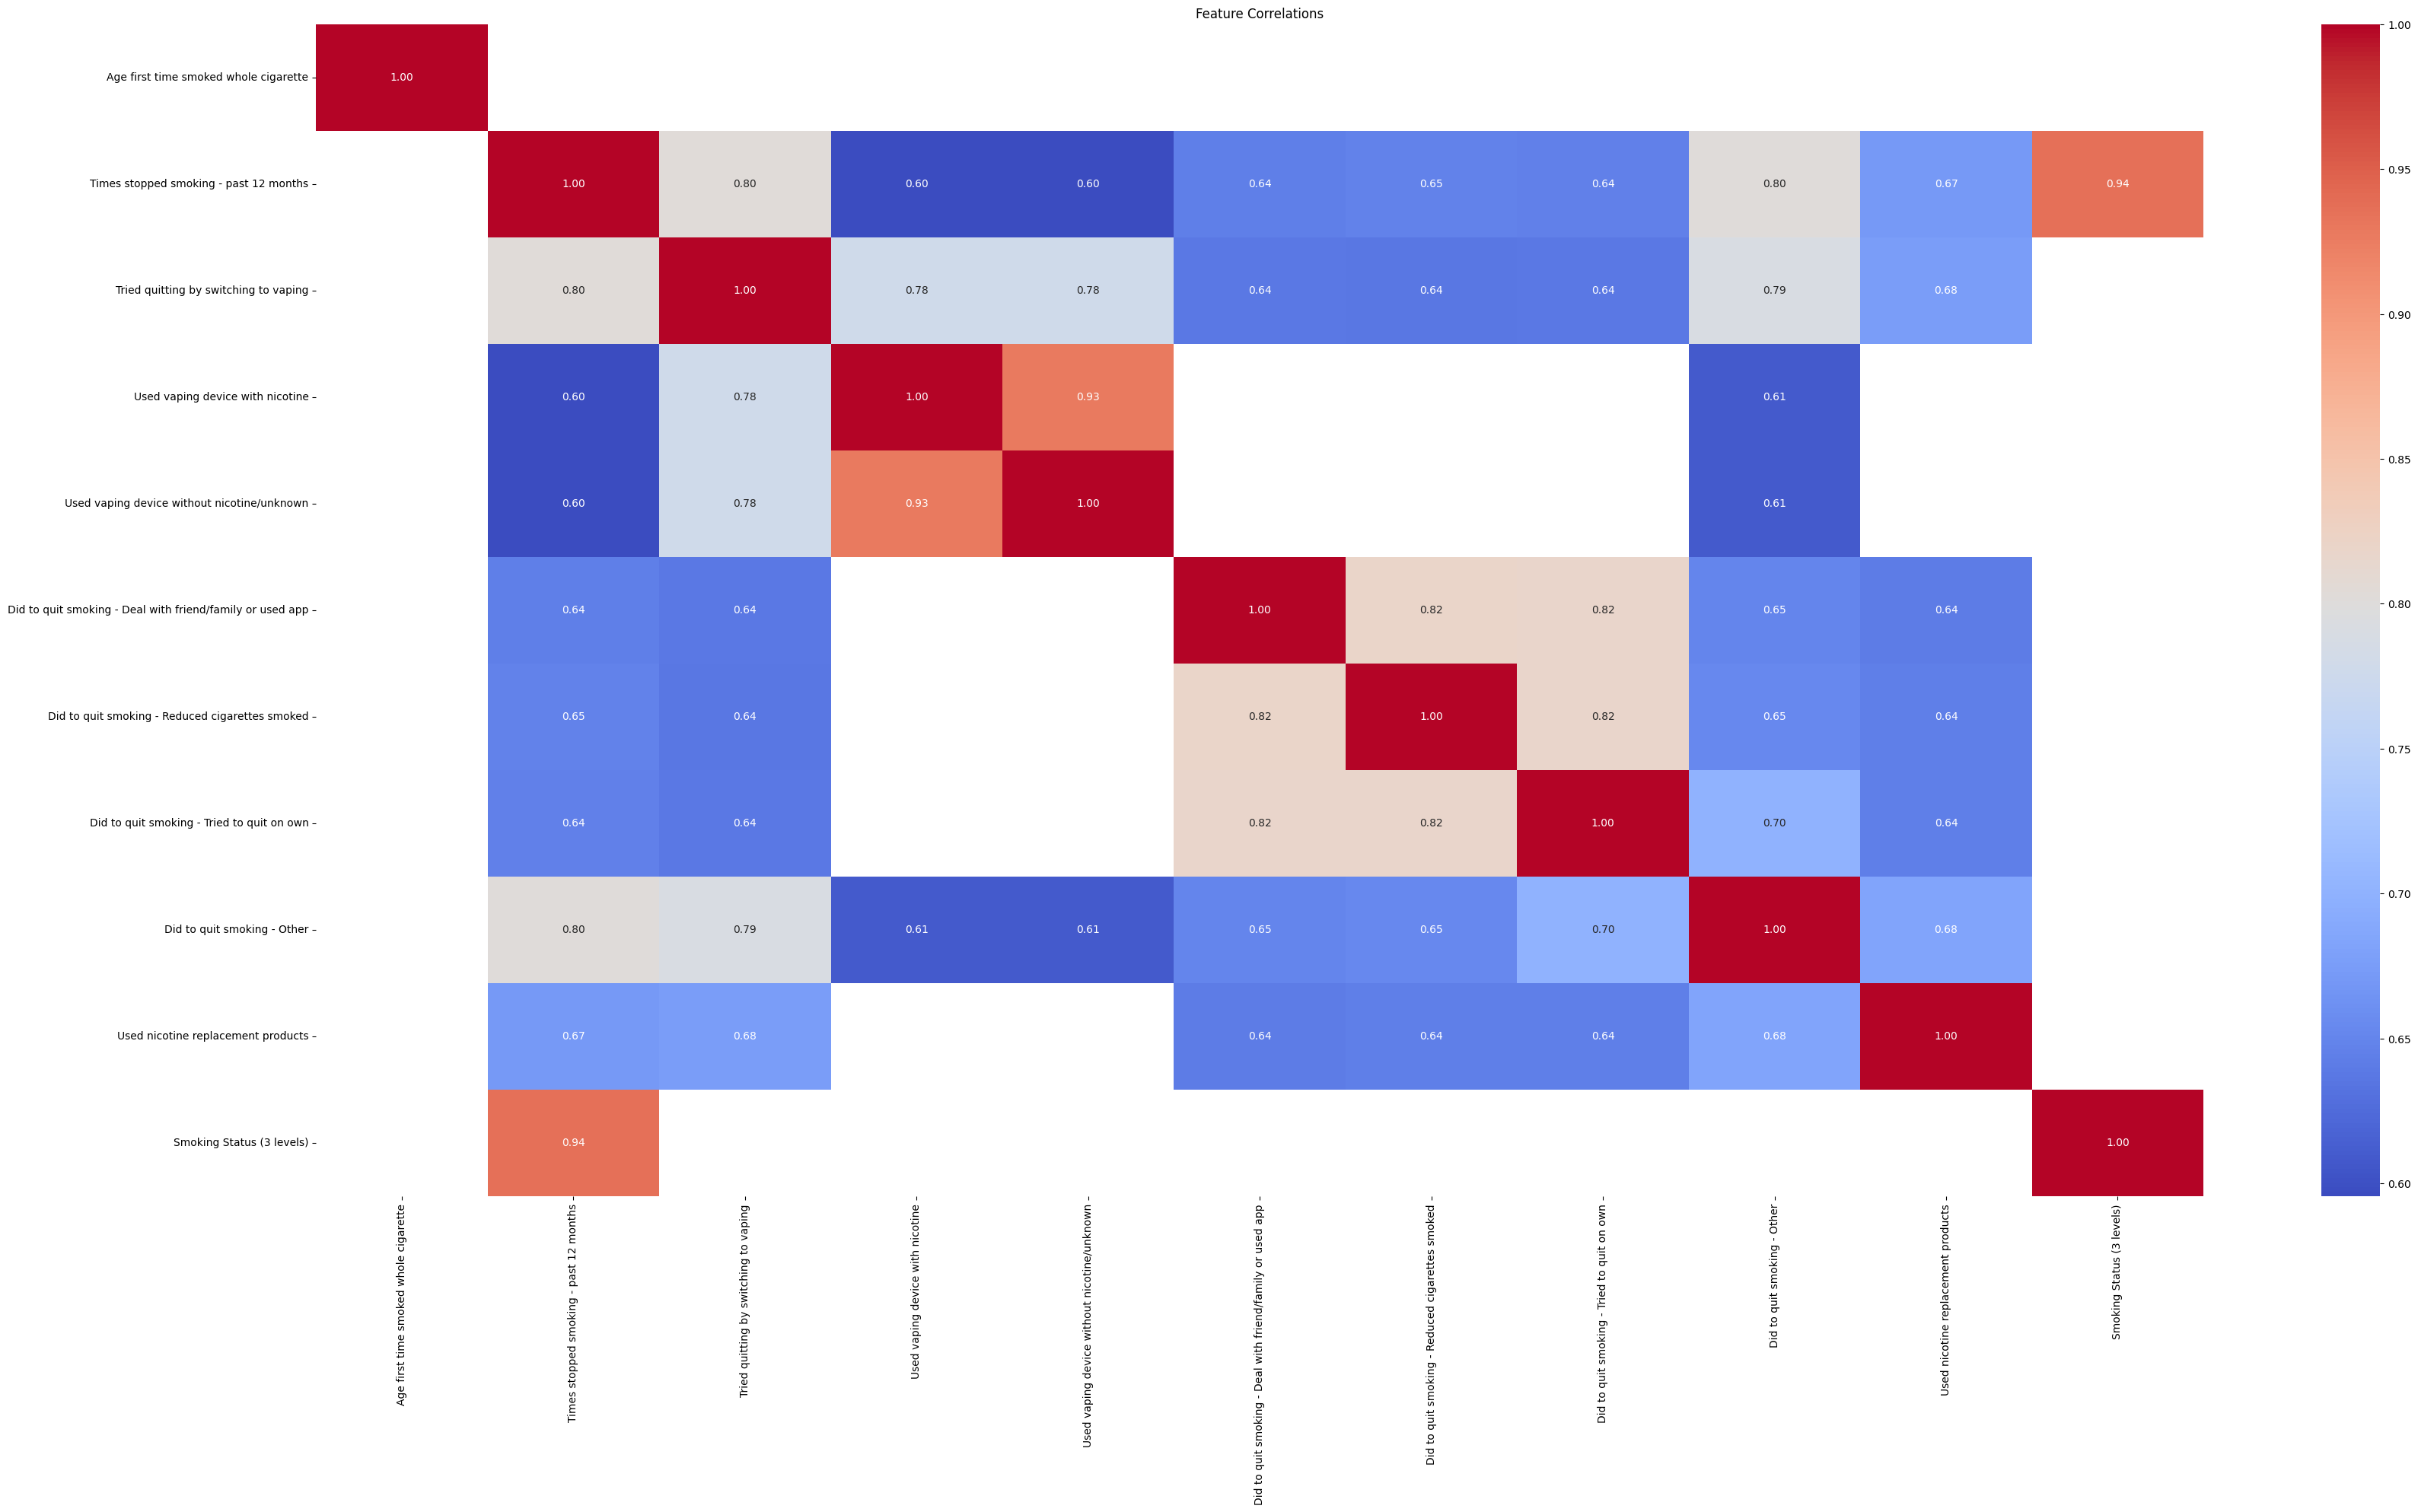

In [4178]:
cv_data = pd.DataFrame(cv_arr, columns = cols, index = cols)
cv_data = cv_data[cv_data > 0.5]

plt.figure(figsize=(40, 20))
sns.heatmap(cv_data, annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

# Modelling

In [4179]:
data=data.drop(["Date of file creation","Survey weight - PUMF"],axis=1)

In [4180]:
data["Smoking Status (3 levels)"].value_counts()

Smoking Status (3 levels)
2    2271
1    1198
Name: count, dtype: int64

In [4181]:
data_numeric = data.select_dtypes(include=["number"])
# Compute correlation matrix
corr_matrix = data.corr()

# Select correlations with target variable (example: "When stopped smoking cigarettes")
target_corr = corr_matrix["Smoking Status (3 levels)"].sort_values(ascending=False)

# Display top correlated features
print(target_corr.head(20))  # Show top 20 relevant features

Smoking Status (3 levels)                                    1.000000
Frequency smoked cigarettes - past 30 days                   0.977868
Smoking Status (4 levels)                                    0.946491
Number of cigarettes smoked - Day 1                          0.907291
Number of cigarettes smoked - Day 3                          0.907237
Number of cigarettes smoked - Day 5                          0.906414
Number of cigarettes smoked - Day 6                          0.905039
Number of cigarettes smoked - Day 4                          0.904286
Number of cigarettes smoked - Day 2                          0.903713
Number of cigarettes smoked - Day 7                          0.902889
Avg cigarettes smoked per day (weekly basis)                 0.895534
Times stopped smoking - past 12 months                       0.888559
Did to quit smoking - Other                                  0.427309
Tried quitting by switching to vaping                        0.426991
Days smoked per week

In [4182]:
# some features with more than 5 categories has 6 as a categorical variable and 96 and 99 represents valid skip and not stated respectively , and others has 6 an 9 for valid skip and not stated.

In [4183]:
#converting valid skip and not stated
for column in data.columns:

    if data[column].isin([96, 99]).any() or len(data[column].unique()) > 6:
        print(f"\033[1;31m{column} : \033[3;31m{data[column].unique()}\033[0m")
        data[column].replace({96:-1,99:-1},inplace=True)

    else:
        print(f"\033[1;34m{column} : \033[3;34m{data[column].unique()}\033[0m") 
        data[column].replace({6:-1,9:-1},inplace=True) 

Random ID : [65199 65200 65203 ... 77312 77313 77314]
Smoked a cigarette - lifetime : [1]
Age first time smoked whole cigarette : [ 3  1  2  6  5 99  4]
Frequency smoked cigarettes - past 30 days : [2 1 4]
Days smoked per week - past 30 days : [2 6 5 1 3 4 9]
Smoked at least 100 cigarettes - lifetime : [1 2 9]
When stopped smoking cigarettes : [6 3 2 1 9]
Month stopped smoking : [96  3  2  1  4 99]
Number of cigarettes smoked - Day 1 : [ 0  2 96  5  3  1  4 99  6]
Number of cigarettes smoked - Day 2 : [ 1  2 96  0  5  4  3 99  6]
Number of cigarettes smoked - Day 3 : [ 0  2 96  5  4  1  3 99  6]
Number of cigarettes smoked - Day 4 : [ 1  2 96  0  5  3  4 99  6]
Number of cigarettes smoked - Day 5 : [ 0  2 96  5  3  1  4 99  6]
Number of cigarettes smoked - Day 6 : [ 1  2 96  0  5  3  4 99  6]
Number of cigarettes smoked - Day 7 : [ 1  2 96  0  5  3  4 99  6]
Times stopped smoking - past 12 months : [1 6 4 3 2 9]
Tried quitting by switching to vaping : [6 2 1 9]
Used vaping device with 

In [4184]:
# to double check the change
for column in data.columns:

    if data[column].isin([96, 99]).any():
        print(f"\033[1;31m{column} : \033[3;31m{data[column].unique()}\033[0m")
        
    else:
        print(f"\033[1;34m{column} : \033[3;34m{data[column].unique()}\033[0m") 
       

Random ID : [65199 65200 65203 ... 77312 77313 77314]
Smoked a cigarette - lifetime : [1]
Age first time smoked whole cigarette : [ 3  1  2  6  5 -1  4]
Frequency smoked cigarettes - past 30 days : [2 1 4]
Days smoked per week - past 30 days : [2 6 5 1 3 4 9]
Smoked at least 100 cigarettes - lifetime : [ 1  2 -1]
When stopped smoking cigarettes : [-1  3  2  1]
Month stopped smoking : [-1  3  2  1  4]
Number of cigarettes smoked - Day 1 : [ 0  2 -1  5  3  1  4  6]
Number of cigarettes smoked - Day 2 : [ 1  2 -1  0  5  4  3  6]
Number of cigarettes smoked - Day 3 : [ 0  2 -1  5  4  1  3  6]
Number of cigarettes smoked - Day 4 : [ 1  2 -1  0  5  3  4  6]
Number of cigarettes smoked - Day 5 : [ 0  2 -1  5  3  1  4  6]
Number of cigarettes smoked - Day 6 : [ 1  2 -1  0  5  3  4  6]
Number of cigarettes smoked - Day 7 : [ 1  2 -1  0  5  3  4  6]
Times stopped smoking - past 12 months : [ 1 -1  4  3  2]
Tried quitting by switching to vaping : [-1  2  1]
Used vaping device with nicotine : [-1 

In [4185]:
# Choose features with absolute correlation > 0.1
selected_features = target_corr[abs(target_corr) > 0.1].index.tolist()

# Remove the target variable itself
selected_features.remove("Smoking Status (3 levels)")

print("Selected Features:", selected_features)

Selected Features: ['Frequency smoked cigarettes - past 30 days', 'Smoking Status (4 levels)', 'Number of cigarettes smoked - Day 1', 'Number of cigarettes smoked - Day 3', 'Number of cigarettes smoked - Day 5', 'Number of cigarettes smoked - Day 6', 'Number of cigarettes smoked - Day 4', 'Number of cigarettes smoked - Day 2', 'Number of cigarettes smoked - Day 7', 'Avg cigarettes smoked per day (weekly basis)', 'Times stopped smoking - past 12 months', 'Did to quit smoking - Other', 'Tried quitting by switching to vaping', 'Days smoked per week - past 30 days', 'Used nicotine replacement products', 'Did to quit smoking - Reduced cigarettes smoked', 'Did to quit smoking - Tried to quit on own', 'Did to quit smoking - Deal with friend/family or used app', 'Frequency vaped - past 30 days', 'Age first time tried vaping', 'Tried vaping - lifetime', 'Age Group', 'Frequency smoked cannabis/tobacco mix - past 30 days', 'Flavour vaped most often', 'Days vaped e-liquid with nicotine - past 30 d

In [4198]:
# I am going to removing some highly corelated features that can lead to data leakage Or features that makes it easy for the model to predict like Number of cigarettes smoked in past 7 days, 30 days so on , month stopped smoking, when stopped smoking and smoking levels

In [4186]:
Removing_features=["Frequency smoked cigarettes - past 30 days","Smoking Status (4 levels)","Number of cigarettes smoked - Day 1","Number of cigarettes smoked - Day 3","Number of cigarettes smoked - Day 5","Number of cigarettes smoked - Day 6","Number of cigarettes smoked - Day 4","Number of cigarettes smoked - Day 2","Number of cigarettes smoked - Day 7","When stopped smoking cigarettes","Month stopped smoking","Avg cigarettes smoked per day (weekly basis)","Days smoked per week - past 30 days"]

In [4187]:
selected_features = [feature for feature in selected_features if feature not in Removing_features]


In [4188]:
selected_features

['Times stopped smoking - past 12 months',
 'Did to quit smoking - Other',
 'Tried quitting by switching to vaping',
 'Used nicotine replacement products',
 'Did to quit smoking - Reduced cigarettes smoked',
 'Did to quit smoking - Tried to quit on own',
 'Did to quit smoking - Deal with friend/family or used app',
 'Frequency vaped - past 30 days',
 'Age first time tried vaping',
 'Tried vaping - lifetime',
 'Age Group',
 'Frequency smoked cannabis/tobacco mix - past 30 days',
 'Flavour vaped most often',
 'Days vaped e-liquid with nicotine - past 30 days',
 'Where get vaping devices - Other',
 'Where get vaping liquids - Other',
 'Times stopped vaping - past 12 months',
 'Where get vaping devices - Store or online',
 'Where get vaping liquids - Store or online',
 'Times picked up vaping device - days vaped',
 'Where get vaping devices - Vape shop',
 'Where get vaping liquids - Vape shop',
 'Puffs taken each time vaping device is picked up',
 'Vaped in the past 30 days (2 levels)',
 '

Times stopped smoking - past 12 months                       0.562397
Tried quitting by switching to vaping                        0.044332
Did to quit smoking - Other                                  0.032071
Did to quit smoking - Reduced cigarettes smoked              0.027594
Did to quit smoking - Tried to quit on own                   0.026716
Used nicotine replacement products                           0.023619
Age Group                                                    0.023208
Did to quit smoking - Deal with friend/family or used app    0.017944
Smoked at least 100 cigarettes - lifetime                    0.017787
Frequency vaped - past 30 days                               0.016941
Age first time tried vaping                                  0.016857
Tried vaping - lifetime                                      0.014639
Age first time smoked cannabis                               0.013064
Highest certificate/diploma/degree completed                 0.012991
Frequency smoked can

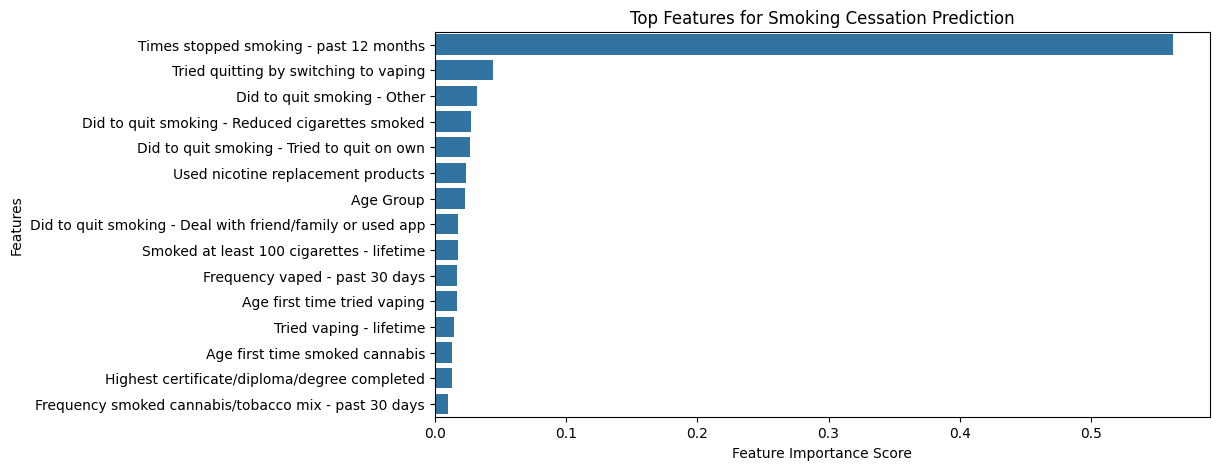

In [4189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data[selected_features]
y = data["Smoking Status (3 levels)"]

# Handle missing values (fill with median)
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top 15 important features
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.head(15), y=feature_importance.head(15).index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Features for Smoking Cessation Prediction")
plt.show()


In [4190]:
imp_features=feature_importance[0:15].index.to_list()

In [4191]:
feature_importance[0:15].index.to_list()

['Times stopped smoking - past 12 months',
 'Tried quitting by switching to vaping',
 'Did to quit smoking - Other',
 'Did to quit smoking - Reduced cigarettes smoked',
 'Did to quit smoking - Tried to quit on own',
 'Used nicotine replacement products',
 'Age Group',
 'Did to quit smoking - Deal with friend/family or used app',
 'Smoked at least 100 cigarettes - lifetime',
 'Frequency vaped - past 30 days',
 'Age first time tried vaping',
 'Tried vaping - lifetime',
 'Age first time smoked cannabis',
 'Highest certificate/diploma/degree completed',
 'Frequency smoked cannabis/tobacco mix - past 30 days']

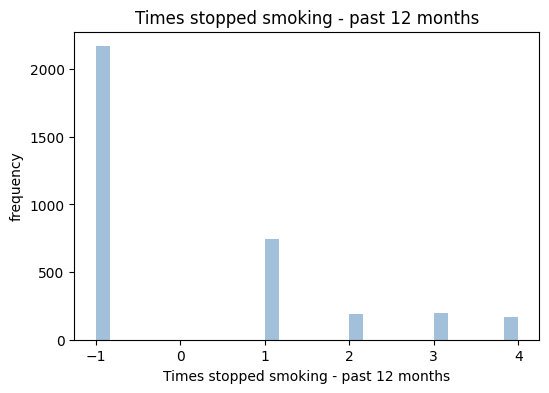

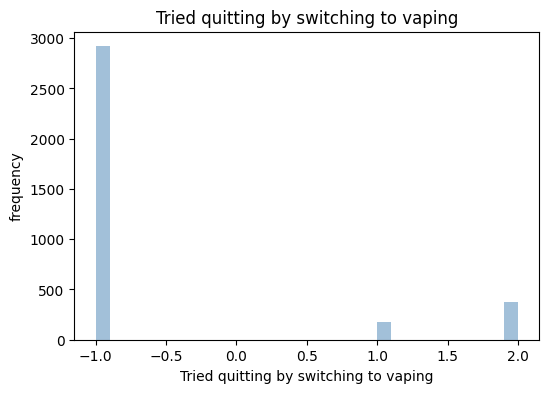

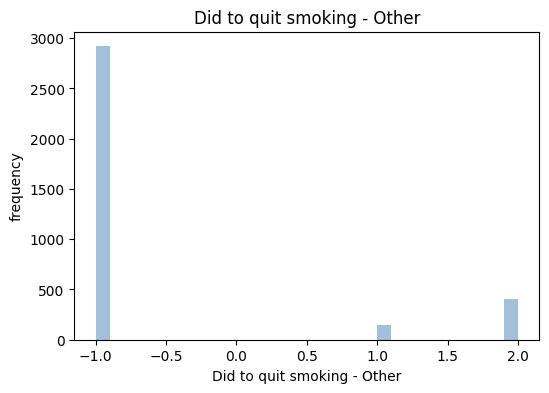

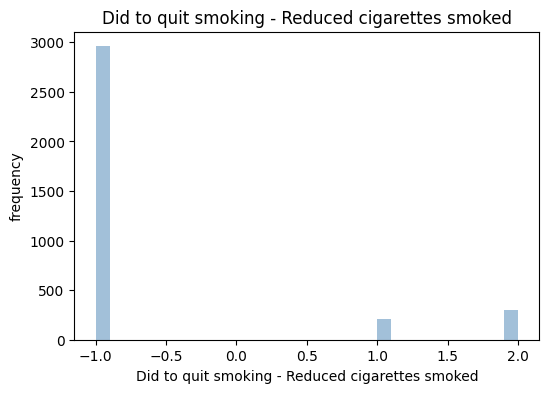

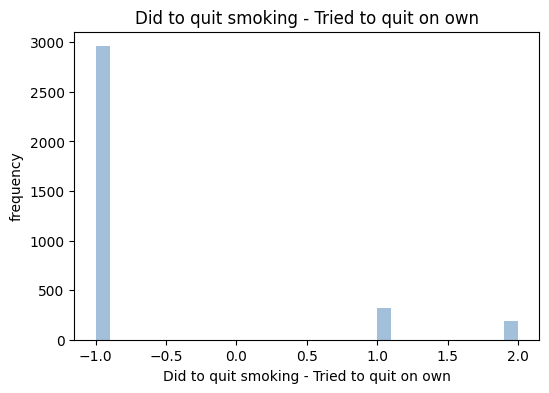

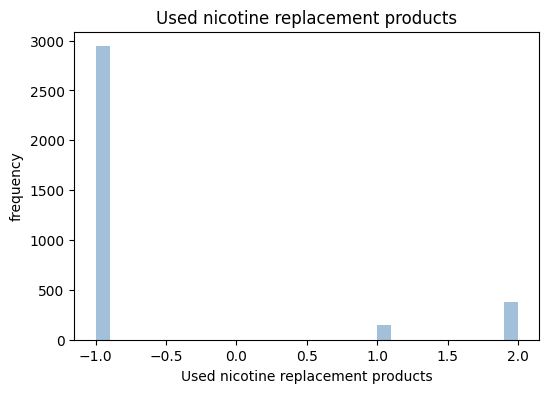

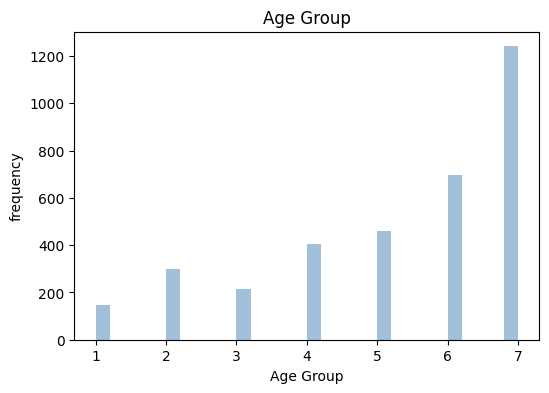

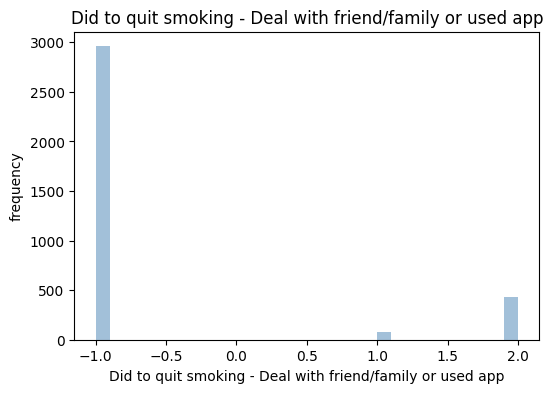

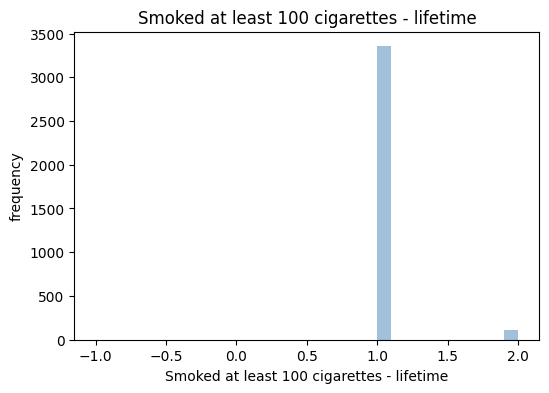

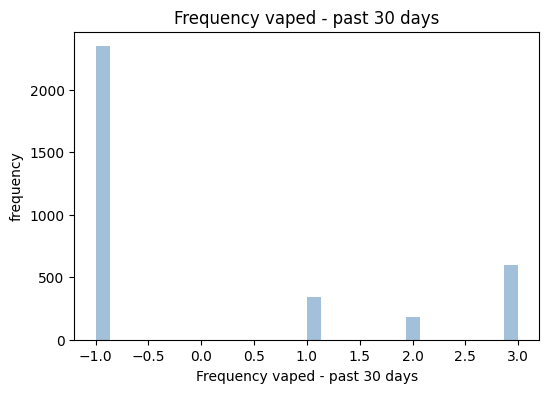

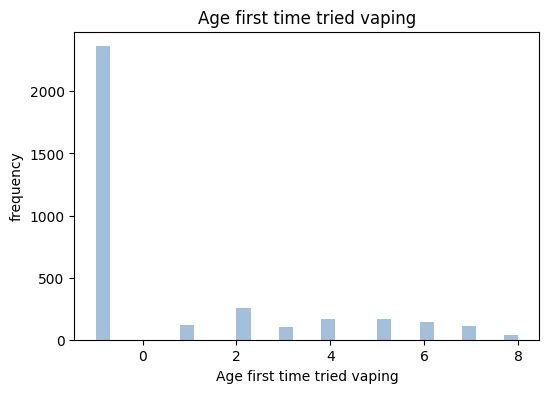

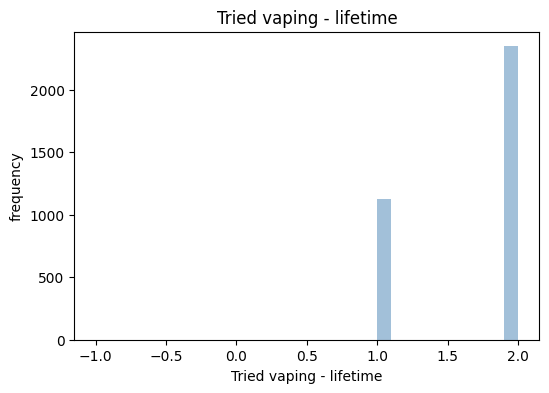

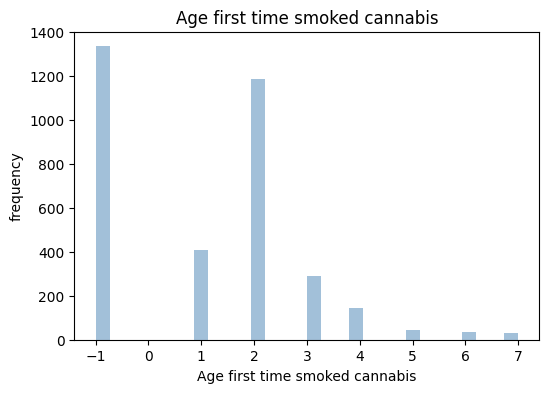

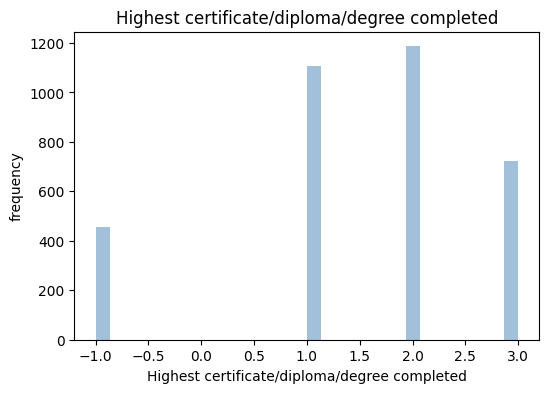

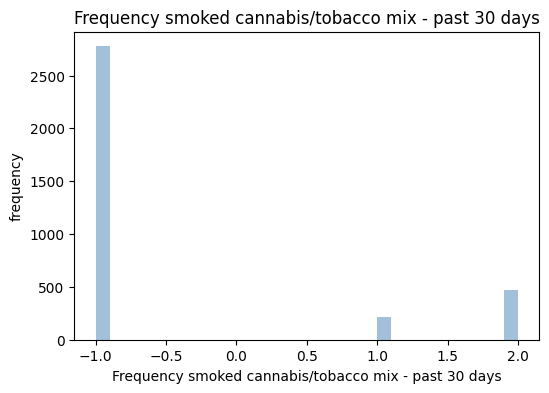

In [4192]:
for feature in imp_features:
    plt.figure(figsize=(6, 4))
    plt.hist(data[feature], bins=30,alpha=0.5,
histtype='stepfilled', color='steelblue',
edgecolor='none');
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("frequency")
plt.show()


In [4193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Select relevant features based on feature importance
selected_features = imp_features

# Define X (features) and y (target)
X = data[selected_features]
y = data["Smoking Status (3 levels)"]


# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [4194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9582132564841499
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       242
           2       0.97      0.96      0.97       452

    accuracy                           0.96       694
   macro avg       0.95      0.96      0.95       694
weighted avg       0.96      0.96      0.96       694



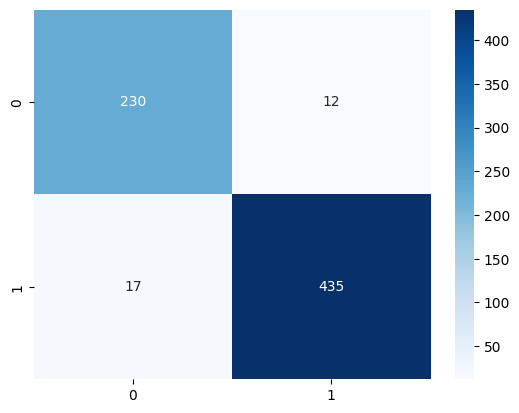

In [4195]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".3g", cmap = "Blues")

In [4196]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.968299711815562
              precision    recall  f1-score   support

           1       0.93      0.98      0.96       242
           2       0.99      0.96      0.98       452

    accuracy                           0.97       694
   macro avg       0.96      0.97      0.97       694
weighted avg       0.97      0.97      0.97       694



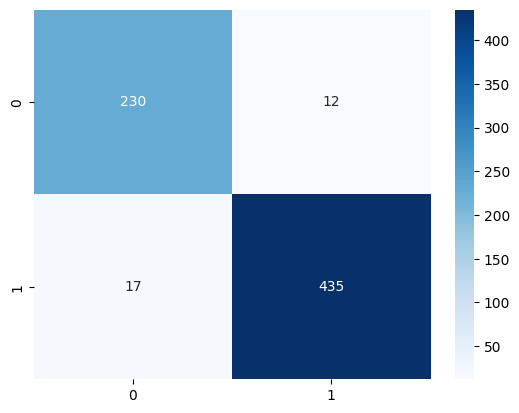

In [4197]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".3g", cmap = "Blues")

In [ ]:
# The two models are performes good with an accuracy of 95 and 98 respectively. And the precision,recall, f1 score and support are balanced.

In [ ]:
#Changes---
# did some eda and plotted graphs
# instead of creating a new target field  "Quit smoking" using the "When stopped smoking cigarettes" feature, used "smoking status"
# removed non-smokers from target variable(just leaving current and former smokers)
# Selected new features for modelling, removed features that can highly influence or that can lead to data leakage,  increased generalization
# corrected the valid skip and not stated part
# used carmers coorelation instead of spearman

In [ ]:
#Further work
# more eda
#work on feature selection and more models
# check for more features that can create data leakage
# can think about using the merged data of three years and do the training, so the model can train on more data, just use the selected features(so check if the merged data has the relevant features)
# research on more effective ways to handle valid skip 